# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

import time
from tqdm.notebook import tqdm
import requests

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../../data/DE/ANOVA_mean/'

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown']

In [5]:
os.listdir(de_dir_path)

['anova_mamm_mean.csv',
 'cluster_spectr_anova_mean_6.csv',
 'cluster_spectr_anova_mean_7.csv',
 'cluster_spectr_anova_mean_8.csv',
 'cluster_spectr_anova_mean_9.csv',
 'ttest_mamm_mean.csv']

## Load files

### DE results

In [6]:
anova_res = pd.read_csv(de_dir_path + 'anova_mamm_mean.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
A1BG   0.122578  12.0  2.796490  0.003701   0.010364
AAAS   0.017527  12.0  0.944161  0.509517   0.596369
AACS   0.136394  12.0  2.729393  0.004508   0.012212
AADAT  0.057031  12.0  5.478881  0.000002   0.000016
AAGAB  0.043359  12.0  2.127609  0.026045   0.053640

In [7]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_mean_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels
anova_labels.name = 'ANOVA_labels'

## Load normalized pseudobulks

In [8]:
pb_dir_path = 'results/'

In [9]:
os.listdir(pb_dir_path)

['.ipynb_checkpoints',
 'ancova_3df_res.pkl',
 'ancova_perm_res.pkl',
 'ancova_res.pkl',
 'chimp_clusters_28.csv',
 'chimp_clusters_50.csv',
 'chimp_clusters_77.csv',
 'chimp_clusters_ancova.csv',
 'colors.csv',
 'constypes.csv',
 'cs_genes_cluster0.pdf',
 'cs_genes_cluster1.pdf',
 'cs_genes_cluster2.pdf',
 'cs_genes_cluster3.pdf',
 'cs_genes_cluster4.pdf',
 'gene_selection_df.csv',
 'hs_anova_inter_clusters.csv',
 'hs_genes_cluster0.pdf',
 'hs_genes_cluster1.pdf',
 'hs_genes_cluster2.pdf',
 'hs_genes_cluster3.pdf',
 'hs_genes_cluster4.pdf',
 'hs_genes_cluster5.pdf',
 'hs_genes_cluster6.pdf',
 'hs_layers.csv',
 'hs_prof.csv',
 'hs_prof_anova.csv',
 'hs_ttest_inter_clusters.csv',
 'human_clusters_28.csv',
 'human_clusters_50.csv',
 'human_clusters_67.csv',
 'human_clusters_77.csv',
 'human_clusters_ancova.csv',
 'human_clusters_ancova_cosall8.csv',
 'hum_spec_onehot.csv',
 'l1_distances.pkl',
 'macaque_clusters_28.csv',
 'macaque_clusters_77.csv',
 'mean_norm_clust_allgenes.csv',
 'opti

In [10]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_mean_filtered.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 5390
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

In [11]:
background_genes = adata_pb_norm.var_names.tolist()
len(background_genes)

5390

## Specie-specific genes

In [12]:
model_res = pd.read_csv('results/gene_selection_df.csv', index_col=0)
model_res.head()

human     chimp   macaque
AACS   0.001206  0.014287  0.318736
AAGAB  0.731575  0.661344  0.024143
AAK1   0.000658  0.699175  0.069657
AAMP   0.762617  0.530339  0.947528
AAR2   0.312623  0.436571  0.343371

In [13]:
import pickle
with open("results/ancova_perm_res.pkl", "rb") as file:
    ancova_results = pickle.load(file)

In [14]:
# import pickle
# with open("./results/specie_specific_genes_tr50.pkl", "rb") as file:
#     genes_dict77 = pickle.load(file)

In [15]:
sign_genes = {key:value[value['p-value'] < 0.01].index for key, value in ancova_results.items()}
sign_genes

{'human-chimp': Index(['ABI2', 'ABLIM3', 'ACTN2', 'ADAM15', 'ADGRB2', 'ADGRL1', 'AK1', 'AKT3',
        'ALCAM', 'ALKBH5',
        ...
        'WDR7', 'WLS', 'YES1', 'YWHAE', 'ZBTB17', 'ZBTB18', 'ZBTB46', 'ZCCHC17',
        'ZMYND8', 'ZNF706'],
       dtype='object', length=322),
 'human-macaque': Index(['AAGAB', 'AARS1', 'AATK', 'ABAT', 'ABCD4', 'ABHD10', 'ABHD6', 'ABHD8',
        'ABLIM3', 'ABT1',
        ...
        'ZNF140', 'ZNF184', 'ZNF189', 'ZNF304', 'ZNF511', 'ZNF536', 'ZNF592',
        'ZNF703', 'ZNF706', 'ZNFX1'],
       dtype='object', length=1355),
 'chimp-macaque': Index(['AATK', 'ABAT', 'ABCC10', 'ABCD4', 'ABHD10', 'ABLIM3', 'ACAD9',
        'ACADVL', 'ACO1', 'ACOT7',
        ...
        'ZC2HC1A', 'ZDHHC22', 'ZDHHC8', 'ZDHHC9', 'ZNF140', 'ZNF184', 'ZNF189',
        'ZNF536', 'ZNF655', 'ZNF703'],
       dtype='object', length=874)}

Попробуем определить человеко-специфичные гены как $(HC\bigcap HM)\setminus CM$

In [16]:
hs_genes = sign_genes['human-chimp'].intersection(sign_genes['human-macaque']).difference(sign_genes['chimp-macaque'])
hs_genes, hs_genes.size

(Index(['ADAM15', 'AKT3', 'ALCAM', 'AMFR', 'APLP2', 'ASAH1', 'ASAP2', 'ATAD1',
        'BLVRA', 'CADM3', 'CCSER2', 'CD99L2', 'CNKSR2', 'COTL1', 'CPNE2',
        'CPNE6', 'DAAM1', 'DCLK1', 'DKK3', 'DLC1', 'DNM2', 'DNPEP', 'DPYSL5',
        'DYNLL2', 'EEF1G', 'EIF1B', 'EIF3F', 'EIF4G3', 'ELOC', 'ENC1',
        'EPB41L3', 'ETFB', 'FADS2', 'FAM171B', 'FBXO9', 'FGF9', 'FOXP1', 'GDE1',
        'GNAZ', 'GNPTAB', 'GRM3', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'JAM2',
        'KHDRBS3', 'KIF21B', 'KLF6', 'KRT222', 'LINGO1', 'LPL', 'MARCKS',
        'MAU2', 'NCAM2', 'NOL10', 'NRXN1', 'NRXN2', 'OCIAD2', 'OTUD4', 'PCDH9',
        'PCGF2', 'PCP4', 'PDE1A', 'PES1', 'PHACTR3', 'PPP2R2C', 'PTPRK',
        'RAB10', 'RAB3GAP1', 'RALYL', 'RBM23', 'RNF40', 'RSPH9', 'SCD5',
        'SCN3B', 'SEZ6L2', 'SIAH1', 'SLC17A7', 'SLC25A29', 'SLC38A10',
        'SLC38A3', 'SLC39A10', 'SLC9A3R2', 'SMARCA1', 'SND1', 'SNRPD2', 'STAU2',
        'SYNGAP1', 'TECR', 'TMED3', 'TMEM108', 'TMOD1', 'USP6NL', 'VAT1L',
        'WD

## Helpful functions

In [17]:
def p_val_group(value):
    if value >= 0.05:
        return 'No significance'
    elif  0.01 <= value < 0.05:
        return 'p < 0.05'
    elif  0.001 <= value < 0.01:
        return 'p < 0.01'
    else:
        return 'p < 0.001'

In [18]:
color_discrete_map = {'No significance': 'darkblue',
                      'p < 0.05': 'purple',
                      'p < 0.01': 'darkorange',
                      'p < 0.001': 'yellow'}

In [128]:
class GeneCluster:
    def __init__(self, genes, descr, label, background_genes, **kwargs):
        self.label = label
        self.genes = genes
        self.descr = descr
        self.background_genes = background_genes
        self.userlist_id = self._get_userlist_id()
        self.background_id = self._get_background_id()
        self.enrichment_res = dict()

    
    def _get_userlist_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        description = "sample gene set with background"

        res = requests.post(
            base_url+'/api/addList',
            files=dict(
              list=(None, '\n'.join(self.genes)),
              description=(None, description),
            )
          )
        if res.ok:
            userlist_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return userlist_response['userListId']
    
    def _get_background_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
            base_url+'/api/addbackground',
            data=dict(background='\n'.join(self.background_genes))
        )

        if res.ok:
            background_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return background_response['backgroundid']

    def enrich(self, gene_set_library):
        # get enrichment results
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
                base_url+'/api/backgroundenrich',
                data=dict(
                userListId=self.userlist_id,
                backgroundid=self.background_id,
                backgroundType=gene_set_library,
                )
            )
        if res.ok:
            data = res.json()
        else:
            raise Exception('Error analyzing gene list')
        # convert results to df
        columns = ['Rank', 'Term', 'p-val', 'Z-score', 'Combined score', 'Overlapping genes', 'Adjusted P-value', 'Old p-value', 'Old adjusted p-value']
        results = pd.DataFrame(data[gene_set_library], columns=columns)
        # preprocess df
        results.Term = results.Term.astype(str)
        results['num_overlap_genes'] = results['Overlapping genes'].apply(lambda x: len(x))
        results['neg_log10(p_adj)'] = - np.log10(results['Adjusted P-value'])
        results['cluster_label'] = self.label
        # save to enrichment_res
        self.enrichment_res[gene_set_library] = results

    @staticmethod
    def enrich_geneclusters(geneclusters, gene_set_library):
        for gc in geneclusters:
            gc.enrich(gene_set_library)

# Clusterisation

In [129]:
df = pd.DataFrame(adata_pb_norm.X, index=adata_pb_norm.obs_names, columns=adata_pb_norm.var_names)

In [130]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = sorted(samples.tolist(), key=lambda x: x[-2:])
    order_laminar = list(filter(lambda x: 'L' in x, order))
    order_wm = list(filter(lambda x: 'WM' in x, order))
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]
df_hs = df[hs_genes].copy()

## Hierarchial

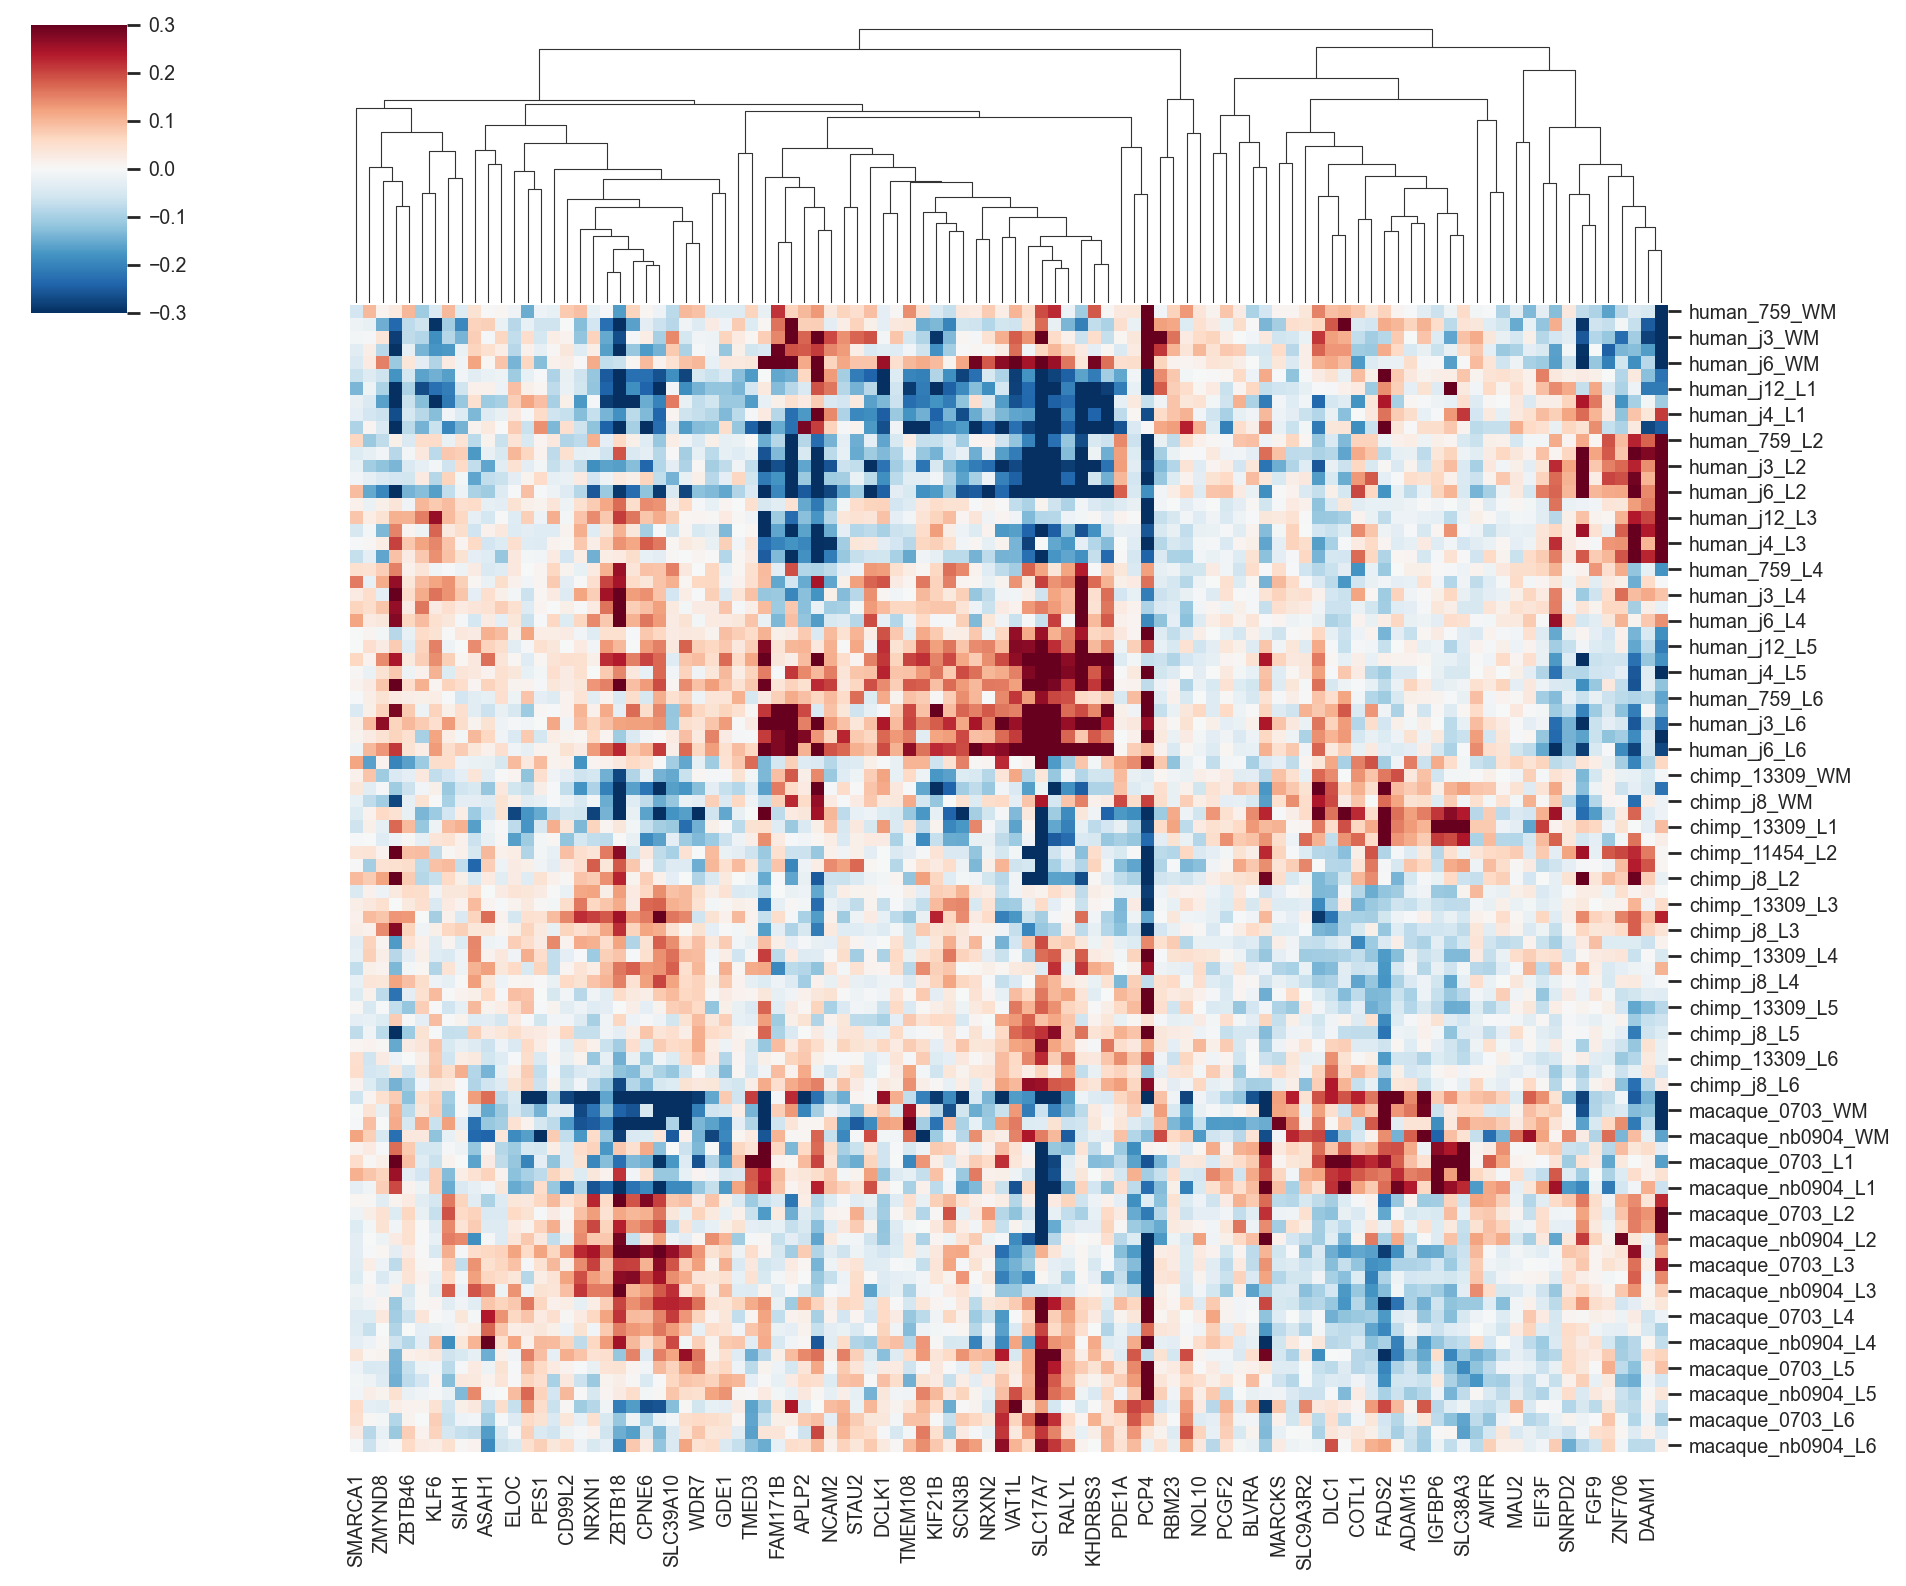

In [131]:
sns.set(font_scale=0.8)
sns.clustermap(df_hs, figsize=(12, 10), cmap="RdBu_r", center=0, vmax=0.3, vmin=-0.3, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

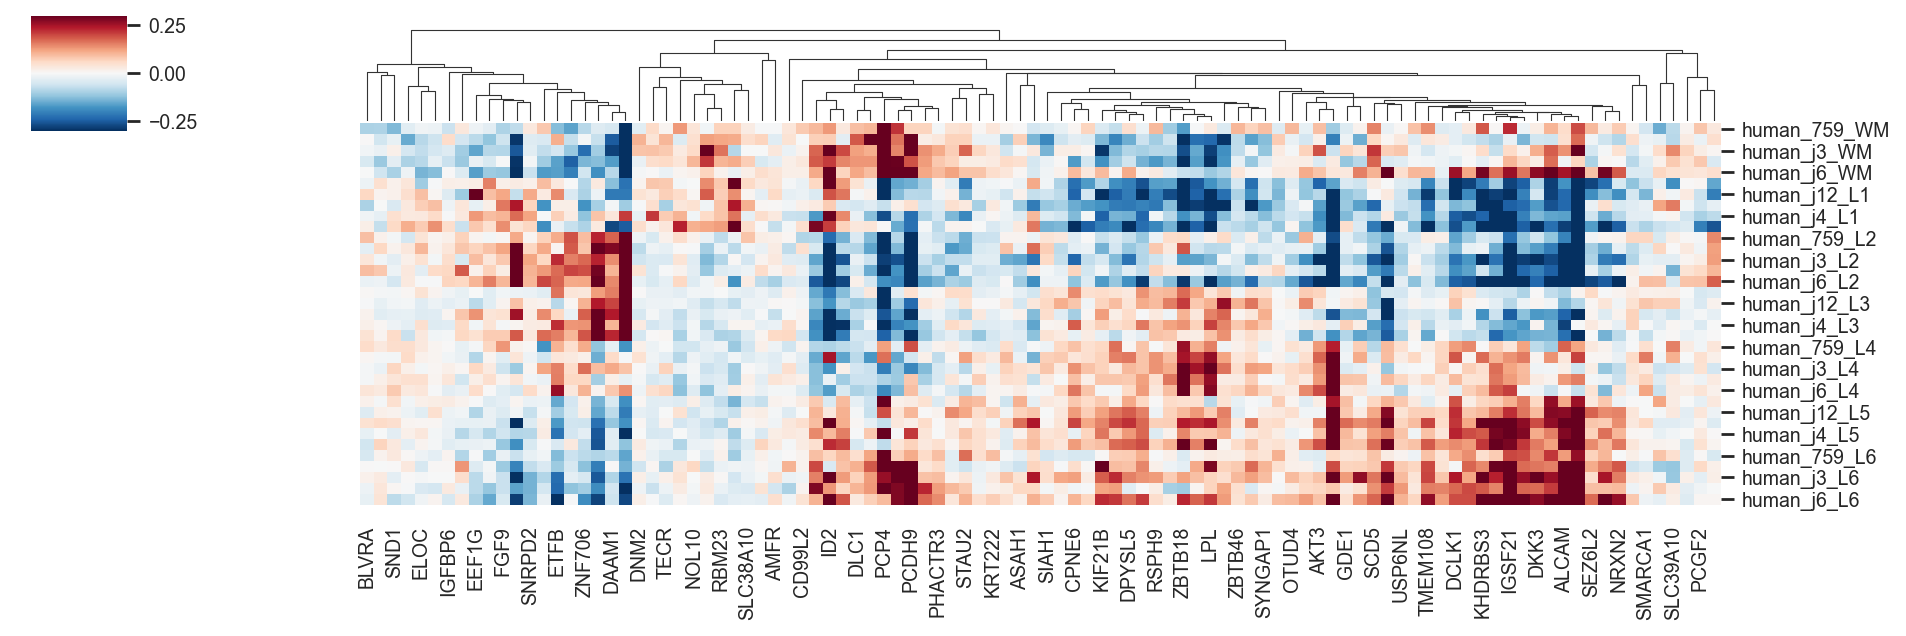

In [132]:
sns.clustermap(df_hs.loc[sample_order['human']], figsize=(12, 4), cmap="RdBu_r", center=0, vmax=0.3, vmin=-0.3, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

## Spectral clusterisation

In [133]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df_hs.T, metric='cosine') + 1
n_clusters = 6
#clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=4)
clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)
#clustering.fit(df_hs.T[sample_order['human']])

SpectralClustering(affinity='precomputed', n_clusters=6, random_state=4)

In [134]:
labels = pd.Series(clustering.labels_, index=hs_genes).sort_values()
order = labels.sort_values().index

In [213]:
labels.to_csv('./results/human_clusters_ancova_01_cos_all_6.csv')

In [136]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown', 'cyan', 'pink', 'violet', 'crimson']

In [137]:
colors = cluster_color[:n_clusters]
clusters = np.arange(n_clusters)

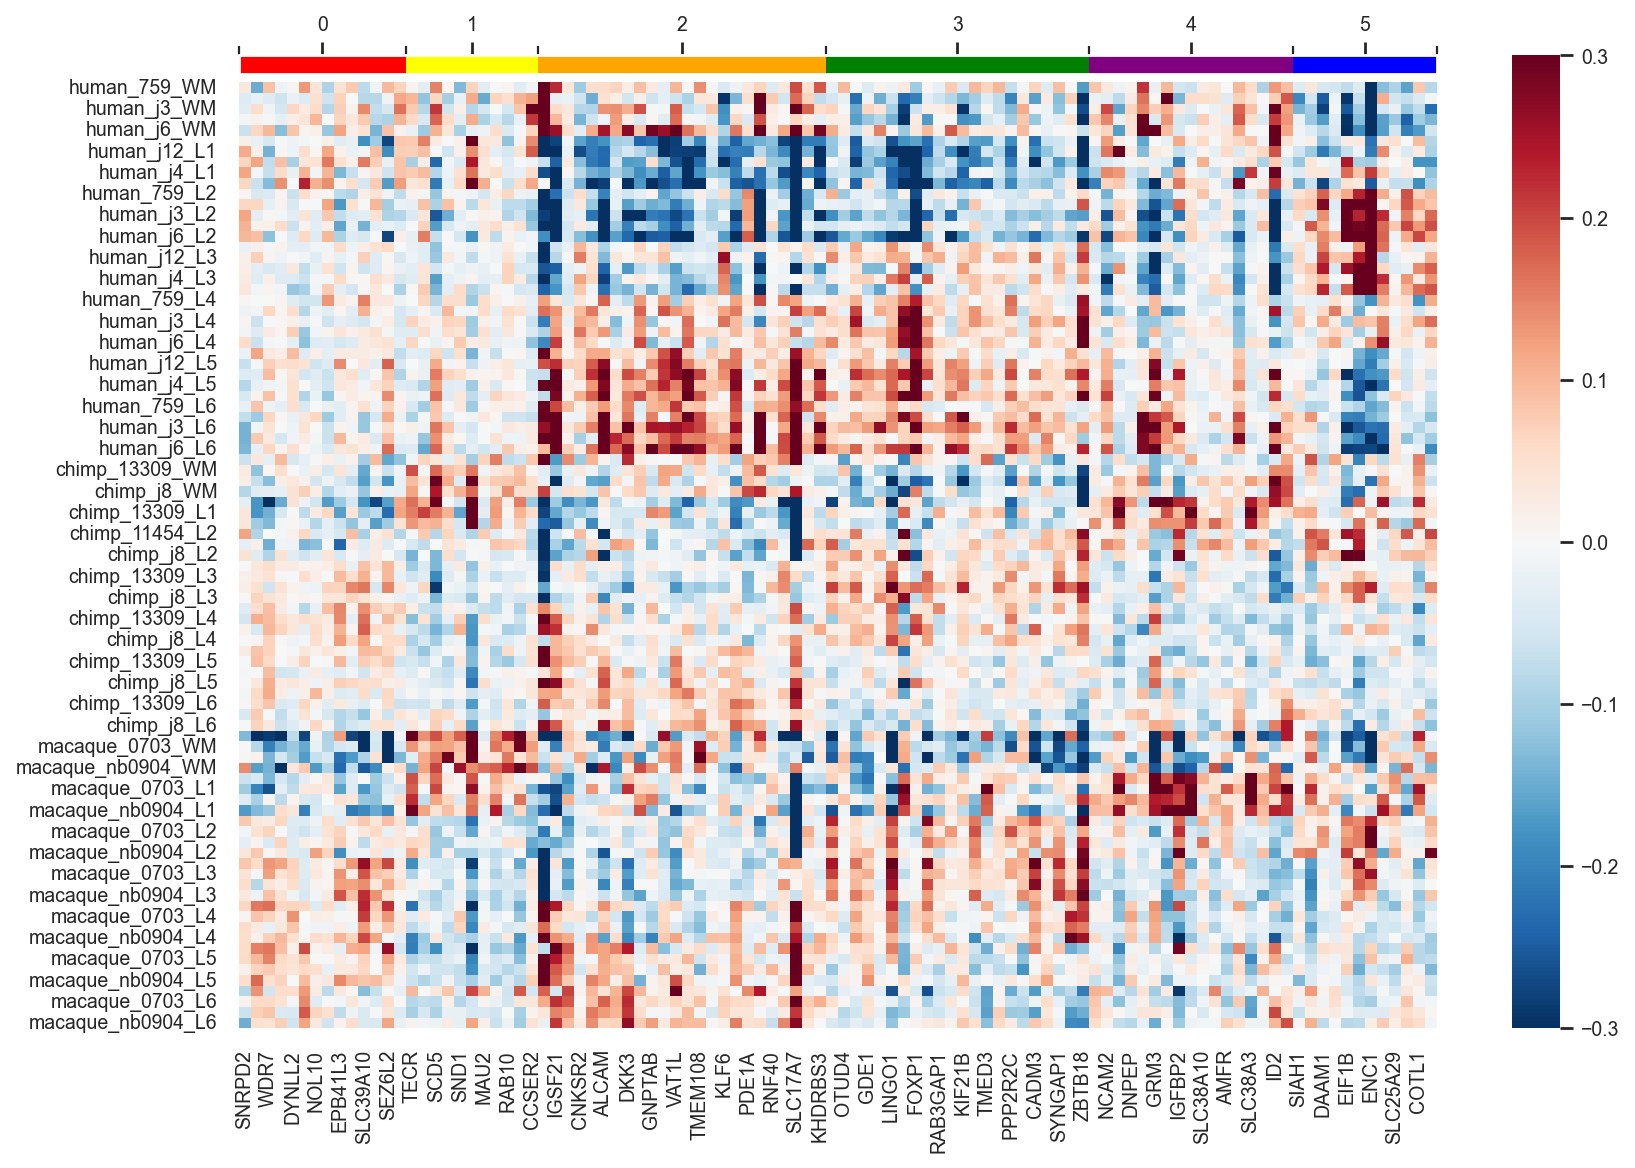

In [138]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_hs[order], ax=ax, cmap="RdBu_r", vmax=0.3, vmin=-0.3, center=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='2%', pad=0.05)
cmap = mpl.colors.ListedColormap(colors)

cluster_size = labels.value_counts().loc[clusters].values
cluster_pos = cluster_size.cumsum()
bounds = [0] + list(cluster_pos)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    ticks=bounds,
    orientation='horizontal',
    spacing='proportional'
)
cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
cax.xaxis.tick_top()

In [139]:
labels[labels == 1].size

11

## Cluster profiles

In [140]:
df_annotation = df_hs.copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [141]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

ADAM15      AKT3     ALCAM      AMFR     APLP2     ASAH1  \
condition layer                                                               
chimp     L1     0.120247 -0.012988  0.009130  0.083703 -0.006447 -0.031851   
          L2    -0.003475 -0.013202 -0.242804  0.070298 -0.034986  0.066117   
          L3    -0.044347  0.004795 -0.066325 -0.016274 -0.042810  0.052351   
          L4    -0.039034 -0.005160  0.006249 -0.060398 -0.058964  0.038820   
          L5    -0.052907 -0.032334  0.134409 -0.049253  0.015875  0.015541   

                    ASAP2     ATAD1     BLVRA     CADM3  ...     TMED3  \
condition layer                                          ...             
chimp     L1    -0.038598 -0.050247  0.120435 -0.017511  ...  0.020563   
          L2    -0.045958  0.049210  0.051300  0.012095  ... -0.013718   
          L3     0.015554  0.006307 -0.002456  0.063143  ... -0.001658   
          L4    -0.018668  0.008142 -0.034010  0.033154  ...  0.015202   
          L5     0.026730 -0.006081 -0.038976  0.012888  ... -0.015029   

                  TMEM108     TMOD1    USP6NL     VAT1L      WDR7    ZBTB18  \
condition layer                                                               
chimp     L1    -0.029963  0.111496 -0.062848 -0.134595 -0.191448 -0.154330   
          L2    -0.048334  0.251171 -0.040401 -0.027984 -0.079114  0.229193   
          L3    -0.046289  0.118402 -0.022866 -0.090556  0.021327  0.178206   
          L4    -0.052551 -0.023878  0.035887 -0.019777  0.088189  0.129230   
          L5     0.007268 -0.132953  0.032619  0.138460  0.082006  0.023022   

                   ZBTB46    ZMYND8    ZNF706  
condition layer                                
chimp     L1     0.026107 -0.001521  0.020416  
          L2     0.072883  0.059591  0.121583  
          L3     0.070541  0.063579  0.067006  
          L4     0.024286  0.019230 -0.001815  
          L5    -0.064324 -0.050828 -0.035676  

[5 rows x 100 columns]

In [142]:
# fig, axes = plt.subplots(2, 2,  figsize=(14, 3.5 * 2), gridspec_kw={'hspace': 0.4})
# for gene, ax in zip(layer_mean.columns, axes.flatten()):
#     (
#             layer_mean[gene]
#             .reorder_levels(['layer', 'condition'])
#             .unstack().loc[layers]
#             .plot
#             .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
#     )
#     ax.grid(False)

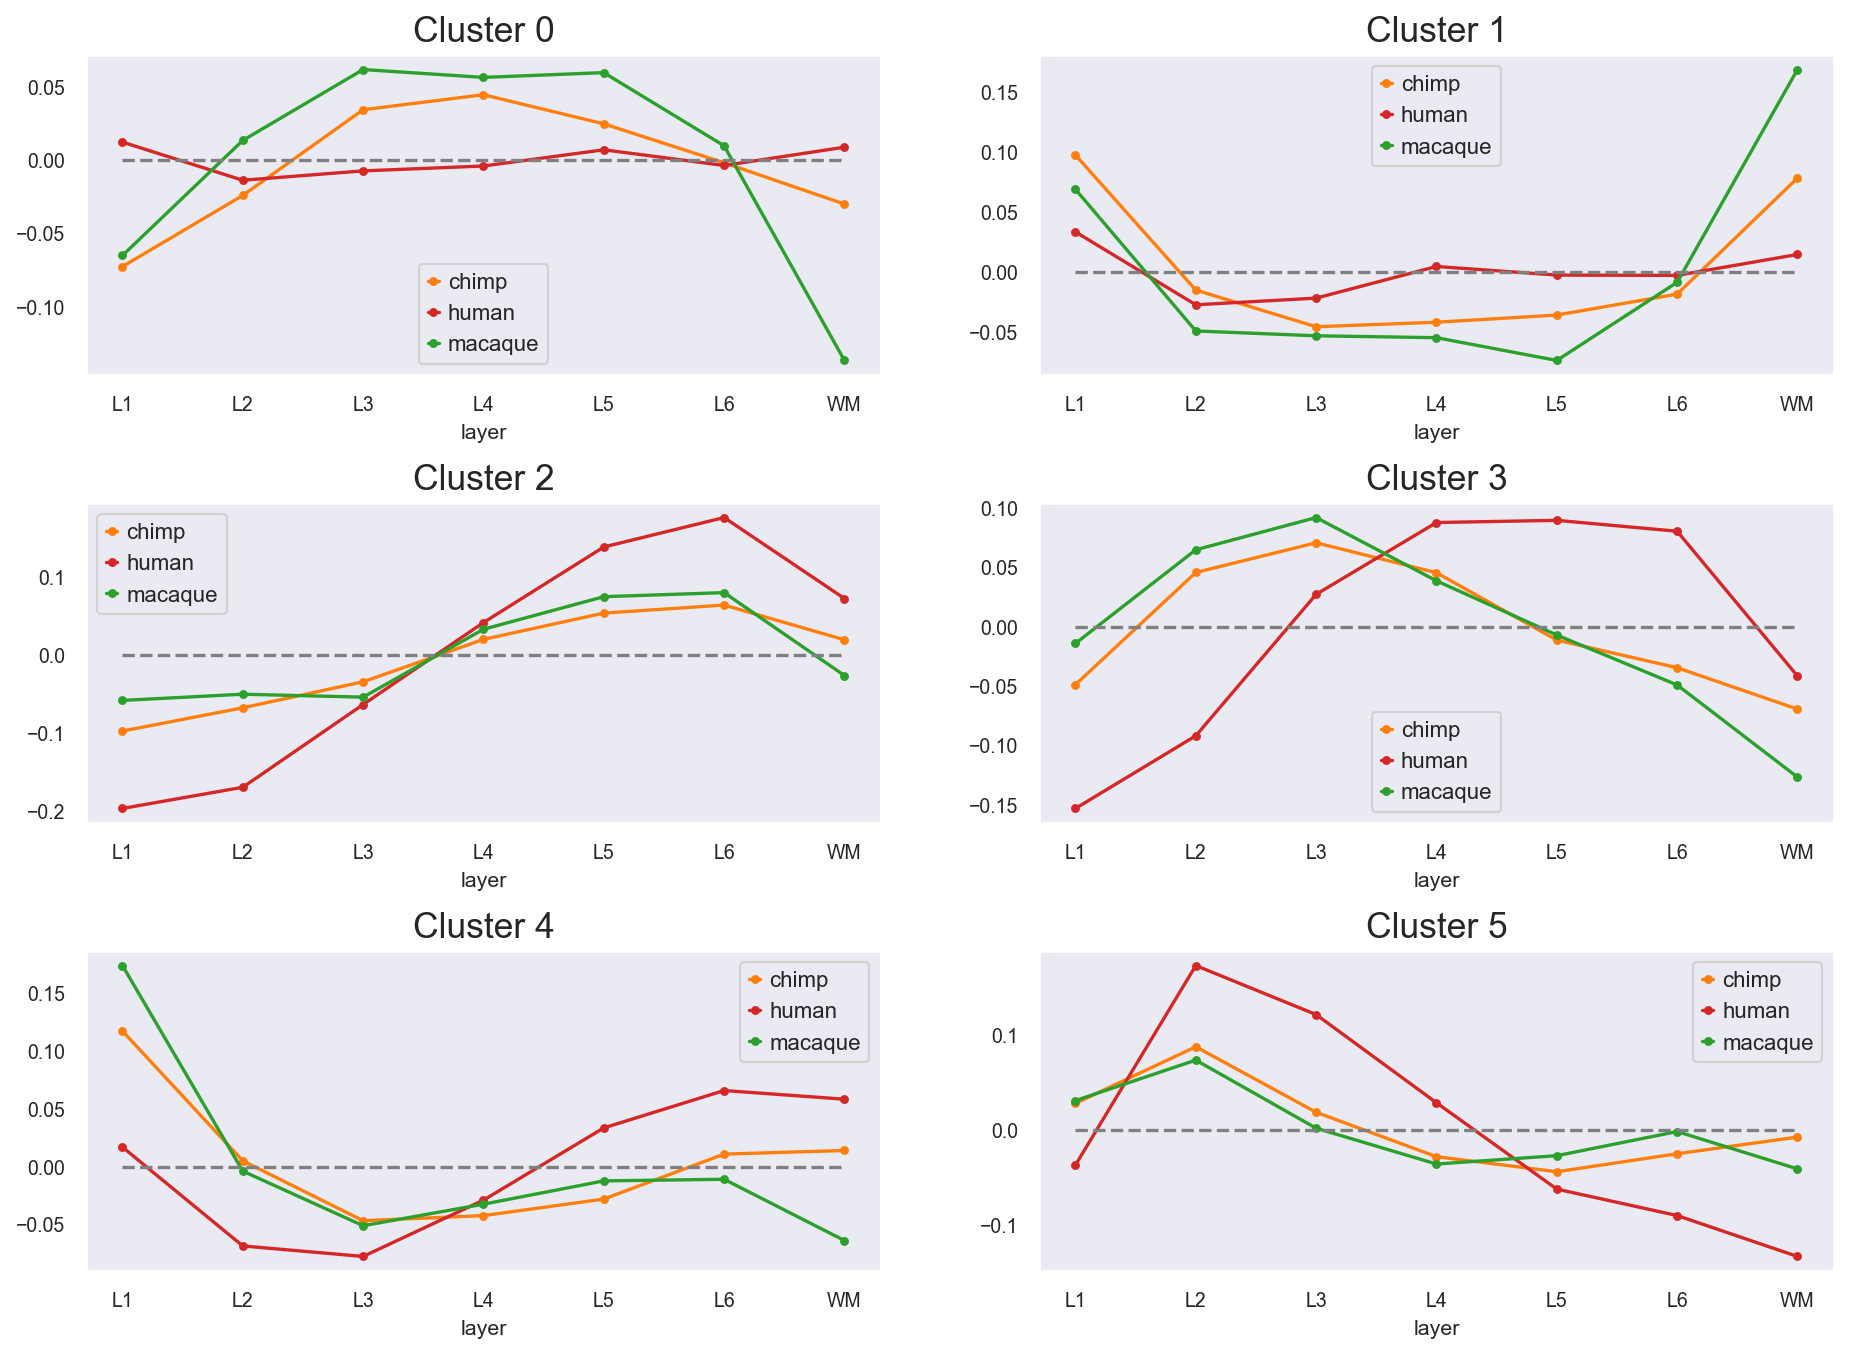

In [143]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

Text(0.5, 0.98, 'Median averaging for profiles')

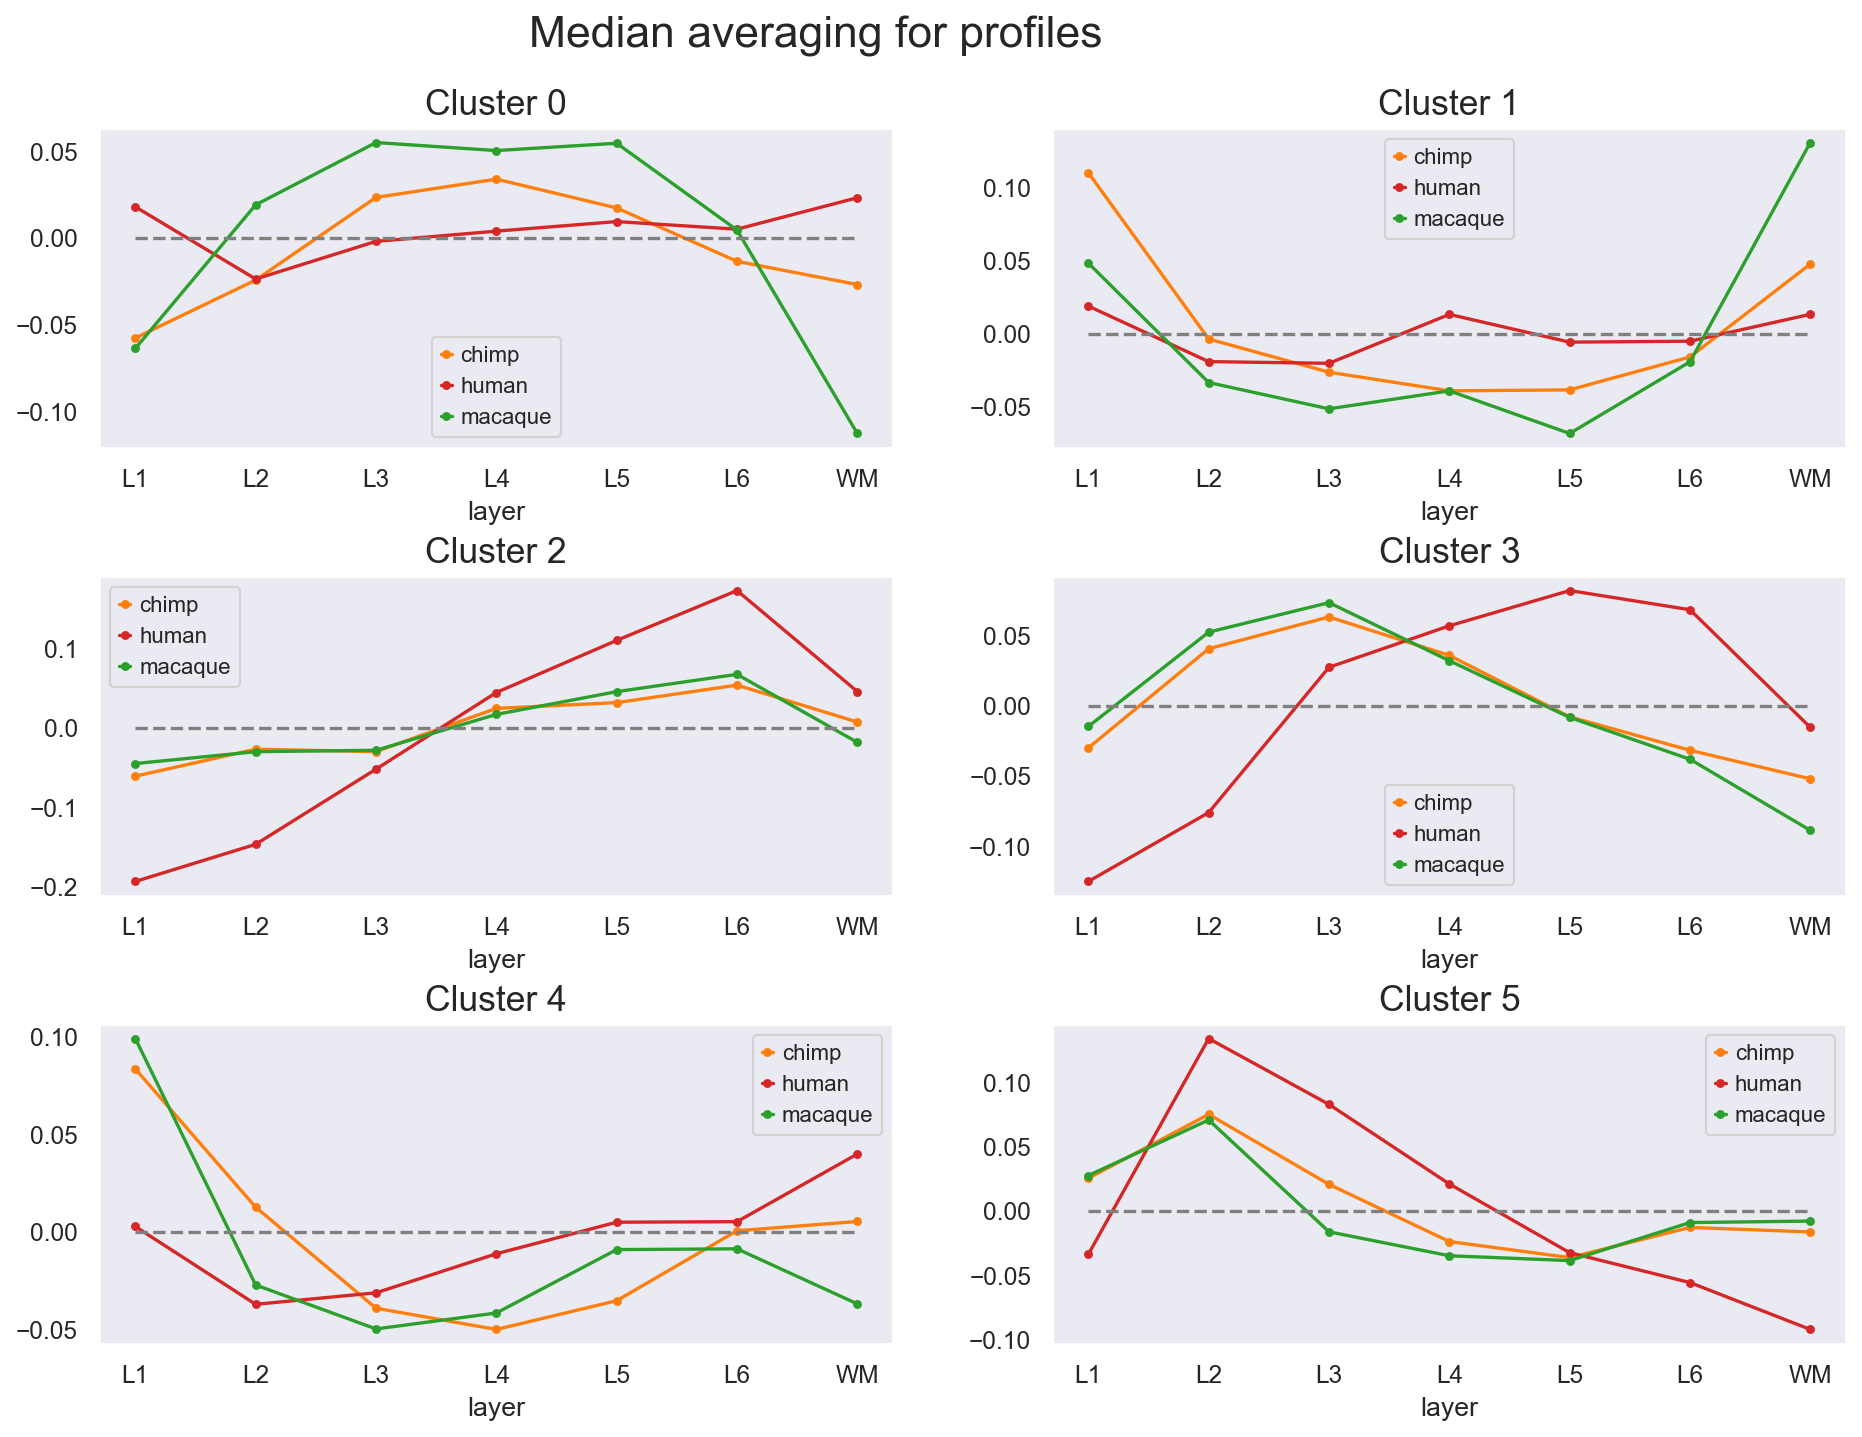

In [144]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .median(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

fig.suptitle('Median averaging for profiles', fontsize=20)

### Cell types

# 4 Species

In [145]:
pb_dir_path = '../../data/pseudobulks/'
adata_pb_4spe = sc.read_h5ad(pb_dir_path + '4spe_pb_mean_filt_nor_mean.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_4spe

AnnData object with n_obs × n_vars = 116 × 6523
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'gene_name'
    uns: 'log1p'

In [146]:
df_4spe = pd.DataFrame(adata_pb_4spe.X, index=adata_pb_4spe.obs_names, columns=adata_pb_4spe.var_names)

In [147]:
hs_genes_inter = df_4spe.columns.intersection(hs_genes)
hs_genes_inter.size

67

In [148]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque', 'treeshrew']:
    samples = df_4spe.loc[df_4spe.index.str.contains(cond)].index
    order_s = sorted(samples.tolist(), key=lambda x: x[:2])
    order_laminar = list(filter(lambda x: 'L' in x, order_s))
    order_wm = list(filter(lambda x: 'WM' in x, order_s))
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque'] + sample_order['treeshrew']
df_4spe = df_4spe.loc[sample_order['all']]
df_4spe_hs = df_4spe[hs_genes_inter]

In [149]:
order_4spe = order.intersection(hs_genes_inter)

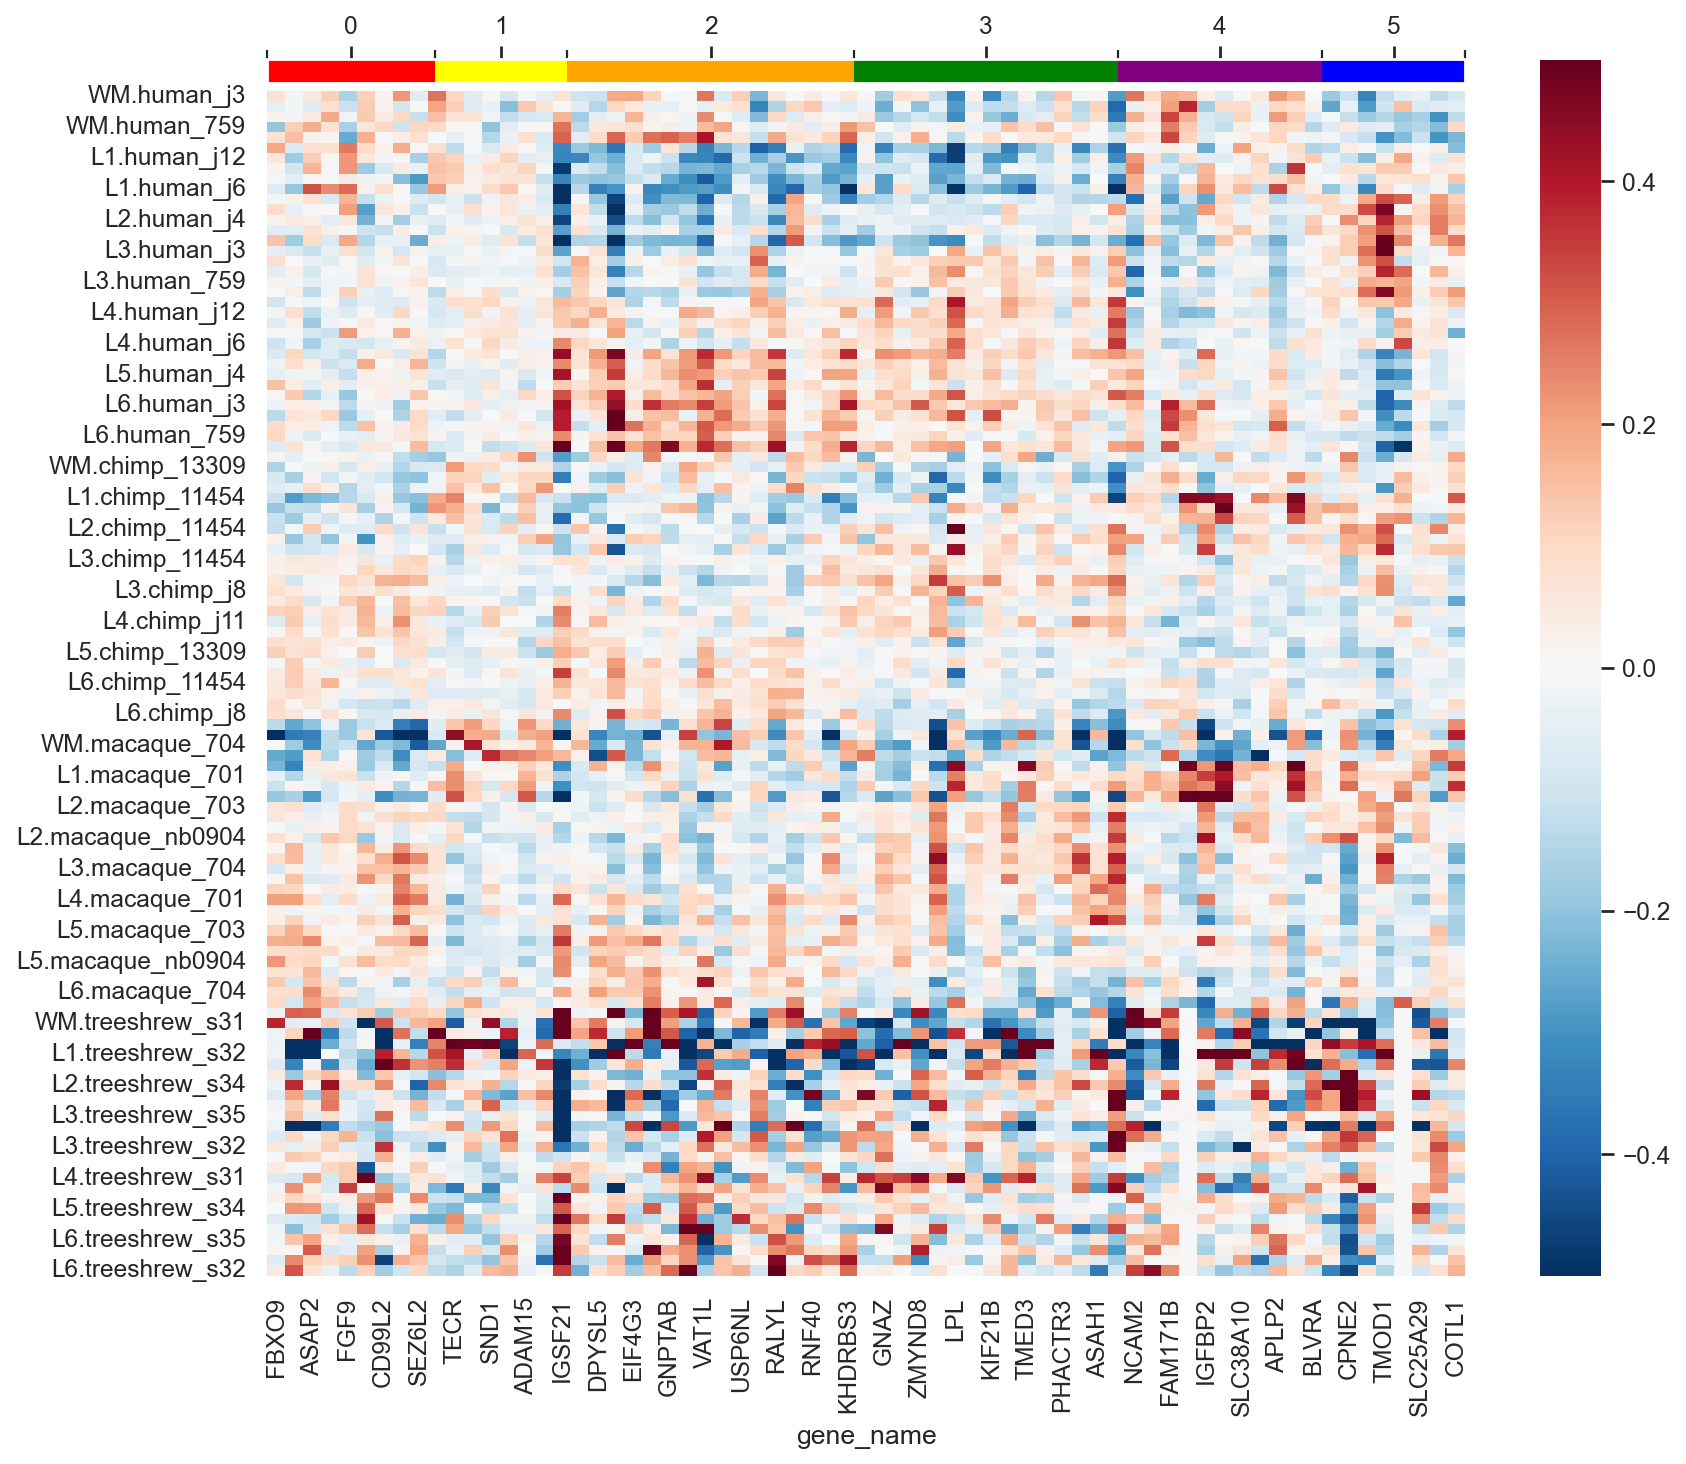

In [150]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_4spe_hs[order_4spe], ax=ax, cmap="RdBu_r", vmax=0.5, vmin=-0.5, center=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='2%', pad=0.05)
cmap = mpl.colors.ListedColormap(colors)

cluster_size = labels.value_counts().loc[clusters].values
cluster_pos = cluster_size.cumsum()
bounds = [0] + list(cluster_pos)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    ticks=bounds,
    orientation='horizontal',
    spacing='proportional'
)
cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
cax.xaxis.tick_top()

## Cluster profiles (mean)

In [151]:
df_annotation = df_4spe_hs.copy()
df_annotation['layer'] = adata_pb_4spe.obs.layer
df_annotation['condition'] = adata_pb_4spe.obs.condition

In [152]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

gene_name          IGSF21    EIF4G3    ADAM15     CADM3    KIF21B    ZBTB18  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.231617 -0.038050  0.142487 -0.009694 -0.061434 -0.137080   
          L2    -0.164320  0.012132 -0.007318  0.019649  0.055080  0.238887   
          L3    -0.013440 -0.050283 -0.062504  0.087419  0.114423  0.185809   
          L4     0.176425  0.033634 -0.046611  0.043859  0.066458  0.131912   

gene_name           ASAP2     NOL10     RAB10    DPYSL5  ...      WDR7  \
condition layer                                          ...             
chimp     6a          NaN       NaN       NaN       NaN  ...       NaN   
          L1    -0.131812 -0.099869 -0.048186 -0.167690  ... -0.193049   
          L2    -0.019229 -0.095543  0.046563  0.068464  ... -0.102755   
          L3     0.024485  0.016631 -0.031884 -0.008634  ...  0.010263   
          L4    -0.022616  0.054456 -0.058043  0.050328  ...  0.111340   

gene_name          ZMYND8   PHACTR3    ZBTB46      TECR      MAU2      ETFB  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1     0.012081 -0.045866  0.019432  0.192520 -0.091200  0.162136   
          L2     0.071141 -0.018842  0.116313 -0.078687  0.028570 -0.038228   
          L3     0.075658  0.039919  0.099157 -0.071254  0.007604 -0.048922   
          L4     0.026744  0.013233  0.029338 -0.076287  0.008512  0.016441   

gene_name            GNAZ     NCAM2      JAM2  
condition layer                                
chimp     6a          NaN       NaN       NaN  
          L1    -0.039300  0.075177  0.285189  
          L2     0.123926  0.041594 -0.111063  
          L3     0.102861 -0.014084 -0.064058  
          L4     0.079627 -0.011287 -0.068254  

[5 rows x 67 columns]

Text(0.5, 0.98, 'Mean averaging for profiles')

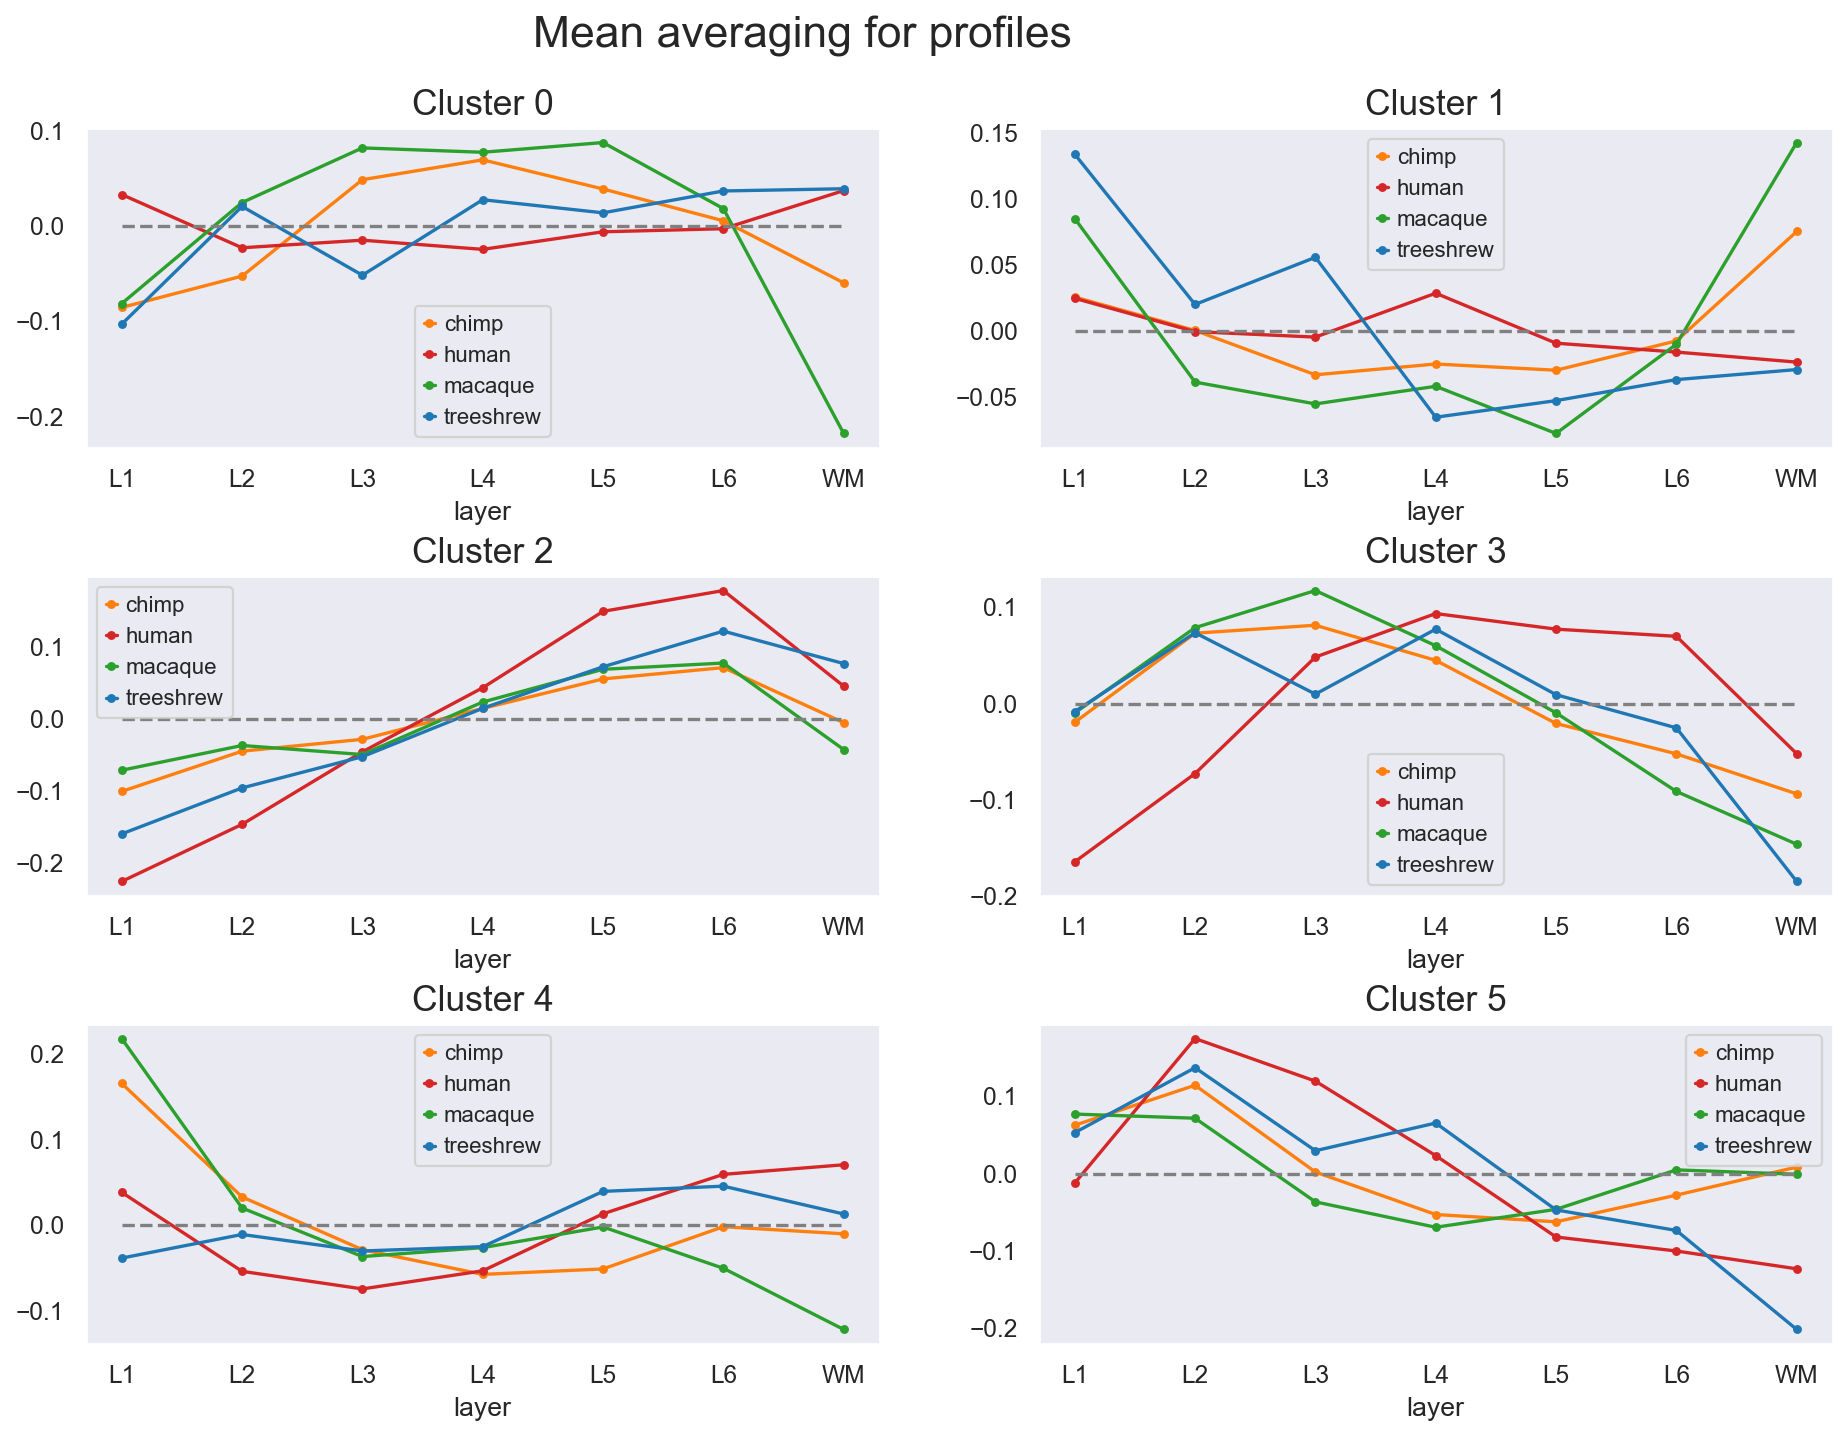

In [153]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.intersection(hs_genes_inter).tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

fig.suptitle('Mean averaging for profiles', fontsize=20)

## Cluster profiles (Median)

Text(0.5, 0.98, 'Median averaging for profiles')

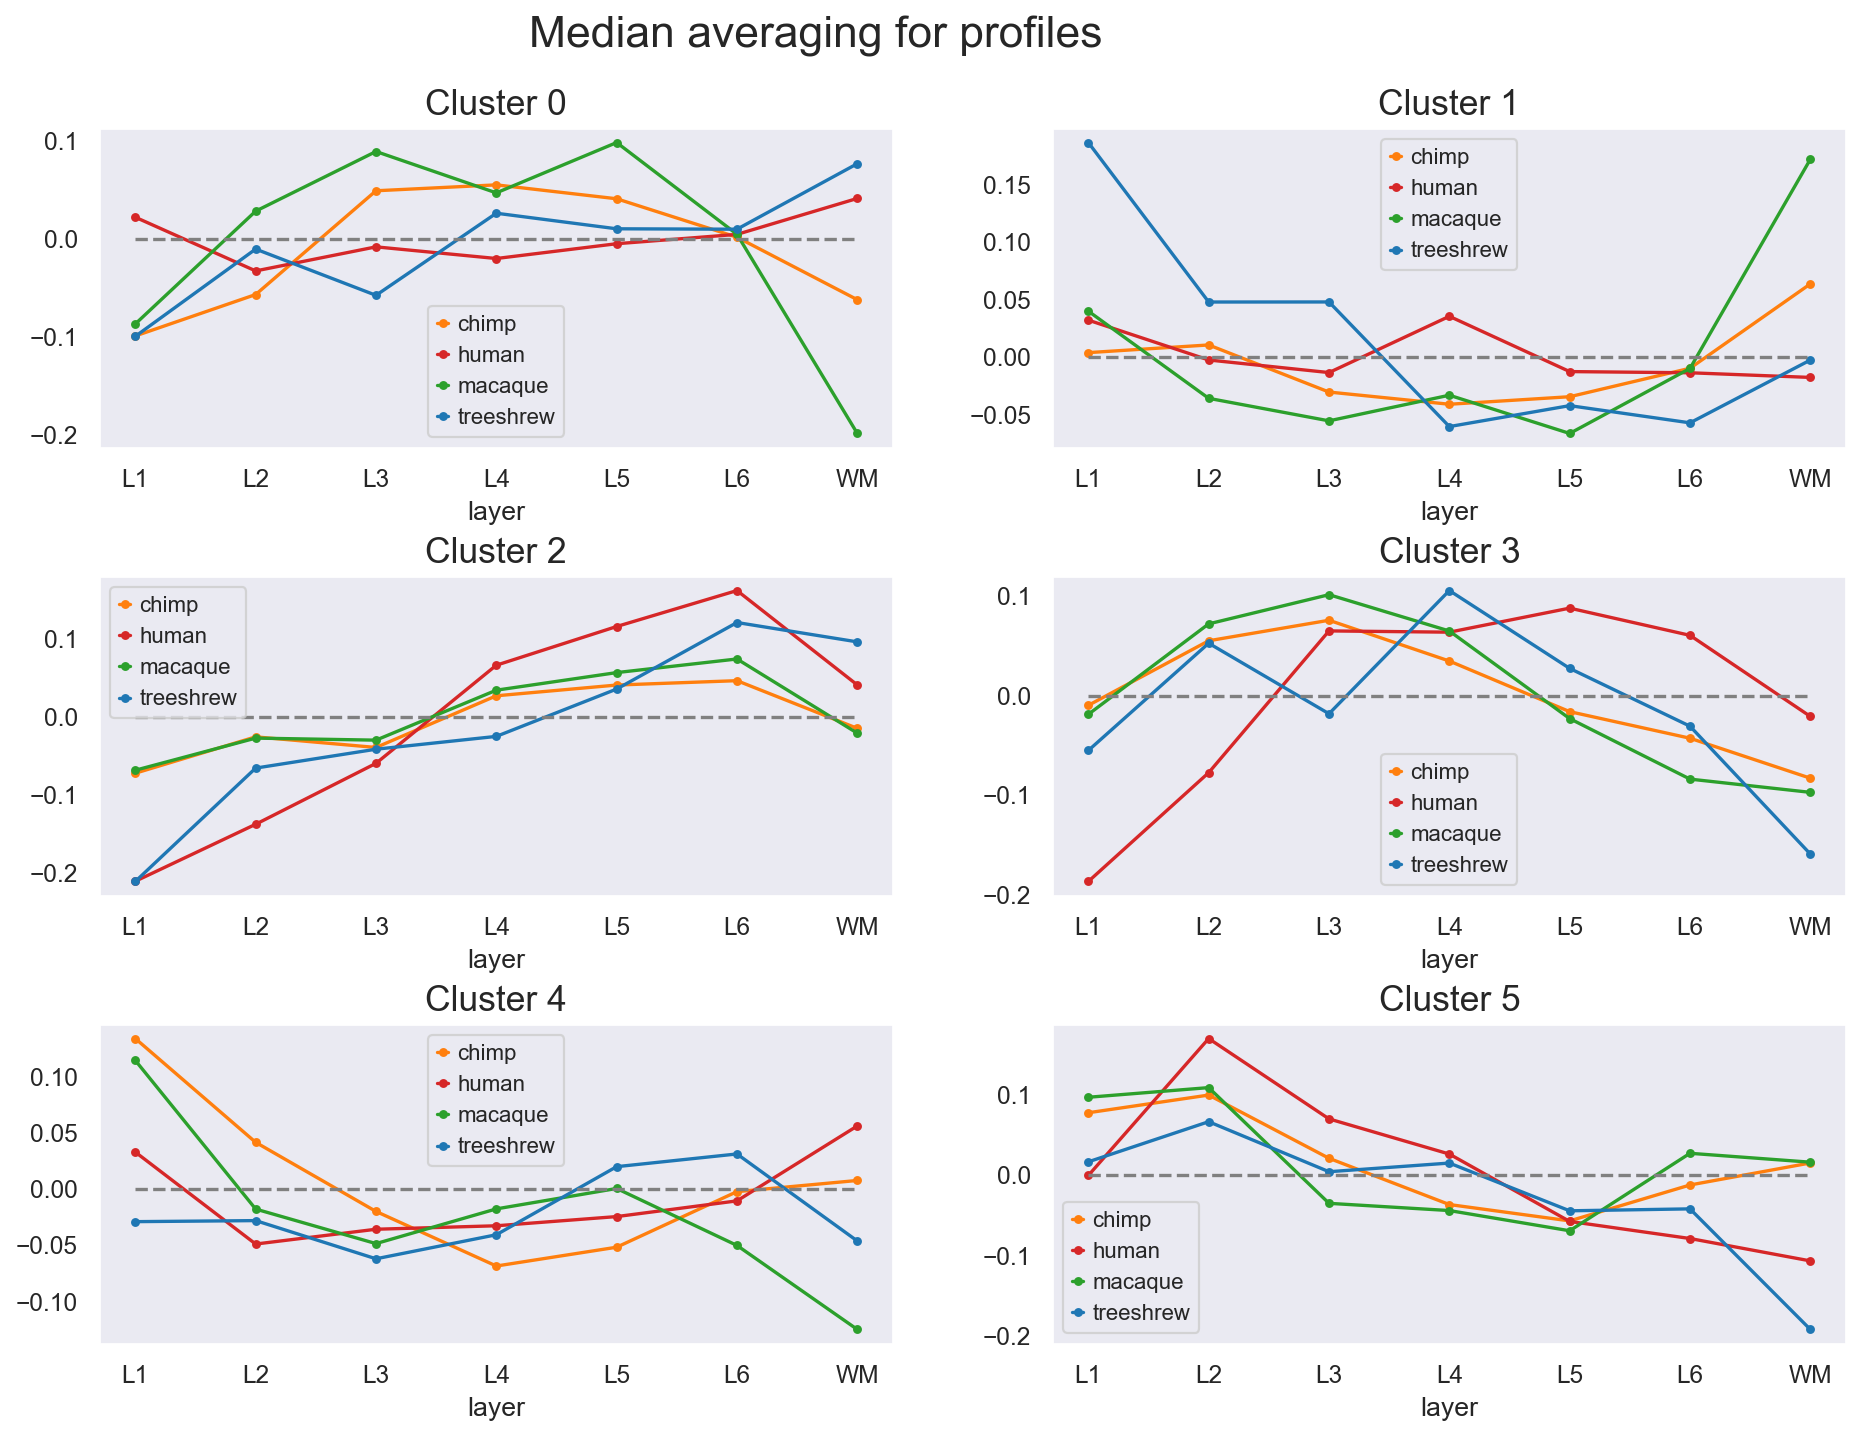

In [154]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.intersection(hs_genes_inter).tolist()

    (
        layer_mean[genes]
        .median(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

fig.suptitle('Median averaging for profiles', fontsize=20)

In [155]:
# sns.set(font_scale=1)
# label = 3
# genes = hs_genes_inter.tolist()
# fig, axes = plt.subplots((len(genes) + 1) // 2, 2,  figsize=(14, 3.5 * len(genes) // 2), gridspec_kw={'hspace': 0.4})

# for gene, ax in zip(genes, axes.flatten()):
#     (
#         layer_mean[gene]
#         .reorder_levels(['layer', 'condition'])
#         .unstack().loc[layers]
#         .plot
#         .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
#     )
#     ax.legend(fontsize=10)
#     ax.set_title(f'{gene}', fontsize=16)
#     ax.grid(False)
#     ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
# plt.savefig('hs_genes_profiles.pdf')

In [156]:
cs_genes = sign_genes['chimp-macaque'].intersection(sign_genes['human-chimp']).difference(sign_genes['human-macaque'])
cs_genes, cs_genes.size

(Index(['ACTN2', 'ANK3', 'AZIN2', 'CALB2', 'DIPK2A', 'DNAJB6', 'FAU', 'KXD1',
        'MASP1', 'MIF', 'MRPL23', 'MYCBP2', 'NUAK1', 'NUP93', 'PQBP1', 'RIPOR2',
        'RPL26', 'RPL35A', 'SEMA3A', 'SEPTIN7', 'SERINC1', 'SGTB', 'SORL1',
        'SRI', 'SULF1', 'THBS1', 'TMEM259', 'TMEM70', 'TPD52L1', 'TSPAN3',
        'USP11', 'WLS'],
       dtype='object'),
 32)

In [157]:
cs_genes_inter = df_4spe.columns.intersection(cs_genes)
cs_genes_inter.size

18

In [158]:
df_4spe_cs = df_4spe[cs_genes_inter]

In [159]:
df_annotation = df_4spe_cs.copy()
df_annotation['layer'] = adata_pb_4spe.obs.layer
df_annotation['condition'] = adata_pb_4spe.obs.condition

In [160]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

gene_name           AZIN2       WLS    DIPK2A      SGTB   SERINC1   TPD52L1  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.024870  0.160677  0.039857 -0.204995 -0.047715  0.052663   
          L2    -0.028452 -0.048604 -0.117550 -0.099180  0.106312  0.110099   
          L3     0.008705 -0.151951  0.009027  0.146068  0.076599 -0.034727   
          L4     0.011918 -0.048296  0.017044  0.110791  0.057703 -0.028150   

gene_name          SEMA3A     USP11     SULF1    TMEM70     SORL1      ANK3  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.161038  0.033495 -0.128867 -0.090638 -0.025362 -0.242198   
          L2    -0.140664 -0.023828 -0.241896 -0.115463  0.068469  0.029233   
          L3     0.005594  0.008553 -0.232210 -0.007174  0.168666  0.104636   
          L4     0.095570 -0.020148 -0.218902 -0.012771  0.058791  0.072445   

gene_name           NUAK1    MYCBP2     THBS1    TSPAN3     NUP93   TMEM259  
condition layer                                                              
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN  
          L1    -0.240461  0.074888  0.037758  0.106345  0.118650 -0.031654  
          L2    -0.198876 -0.056972  0.471778 -0.007965  0.011037 -0.020200  
          L3    -0.099823 -0.071916  0.514841 -0.054059  0.038760  0.003608  
          L4    -0.055705 -0.089579  0.272352 -0.022184 -0.023170 -0.025835

In [161]:
# sns.set(font_scale=1)
# label = 3
# genes = cs_genes_inter.tolist()
# fig, axes = plt.subplots((len(genes) + 1) // 2, 2,  figsize=(14, 3.5 * len(genes) // 2), gridspec_kw={'hspace': 0.4})

# for gene, ax in zip(genes, axes.flatten()):
#     (
#         layer_mean[gene]
#         .reorder_levels(['layer', 'condition'])
#         .unstack().loc[layers]
#         .plot
#         .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
#     )
#     ax.legend(fontsize=10)
#     ax.set_title(f'{gene}', fontsize=16)
#     ax.grid(False)
#     ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
# plt.savefig('cs_genes_profiles.pdf')

# Intersection with ANOVA clusters

In [162]:
anova_hs_inter = hs_genes.intersection(anova_labels.index)
anova_hs_inter

Index(['ADAM15', 'AKT3', 'ALCAM', 'APLP2', 'ASAH1', 'ASAP2', 'ATAD1', 'BLVRA',
       'CADM3', 'CCSER2', 'CD99L2', 'CNKSR2', 'COTL1', 'CPNE2', 'CPNE6',
       'DAAM1', 'DCLK1', 'DKK3', 'DLC1', 'DNM2', 'DNPEP', 'DPYSL5', 'DYNLL2',
       'EEF1G', 'EIF1B', 'EIF3F', 'EIF4G3', 'ELOC', 'ENC1', 'EPB41L3', 'ETFB',
       'FADS2', 'FAM171B', 'FBXO9', 'FGF9', 'FOXP1', 'GDE1', 'GNAZ', 'GNPTAB',
       'GRM3', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'JAM2', 'KHDRBS3',
       'KIF21B', 'KLF6', 'KRT222', 'LINGO1', 'LPL', 'MARCKS', 'MAU2', 'NCAM2',
       'NOL10', 'NRXN1', 'NRXN2', 'OCIAD2', 'OTUD4', 'PCDH9', 'PCGF2', 'PCP4',
       'PDE1A', 'PES1', 'PHACTR3', 'PPP2R2C', 'PTPRK', 'RAB10', 'RALYL',
       'RBM23', 'RNF40', 'RSPH9', 'SCD5', 'SCN3B', 'SEZ6L2', 'SIAH1',
       'SLC17A7', 'SLC25A29', 'SLC38A10', 'SLC38A3', 'SLC39A10', 'SLC9A3R2',
       'SMARCA1', 'SND1', 'SNRPD2', 'STAU2', 'SYNGAP1', 'TECR', 'TMED3',
       'TMEM108', 'TMOD1', 'USP6NL', 'VAT1L', 'WDR7', 'ZBTB18', 'ZBTB46',
       'ZMYND8',

In [163]:
table_to_pivot = pd.concat([anova_labels.loc[anova_hs_inter], labels.loc[anova_hs_inter]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels       0    1     2     3     4     5
ANOVA_labels                                  
0             0.0  1.0   0.0   0.0   0.0  10.0
1             4.0  0.0   5.0   0.0   1.0   0.0
2             0.0  1.0  19.0  12.0   2.0   1.0
3             0.0  5.0   0.0   0.0   0.0   0.0
4             4.0  0.0   0.0   0.0   1.0   1.0
5             6.0  0.0   0.0   9.0   0.0   0.0
6             0.0  4.0   0.0   0.0  12.0   0.0

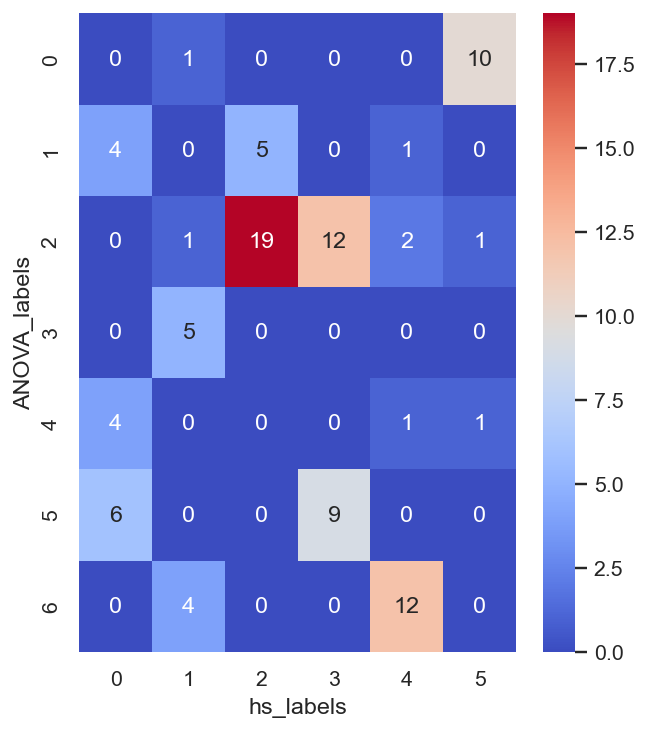

In [164]:
plt.figure(figsize=(5, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', fmt=".0f")
plt.grid(False)

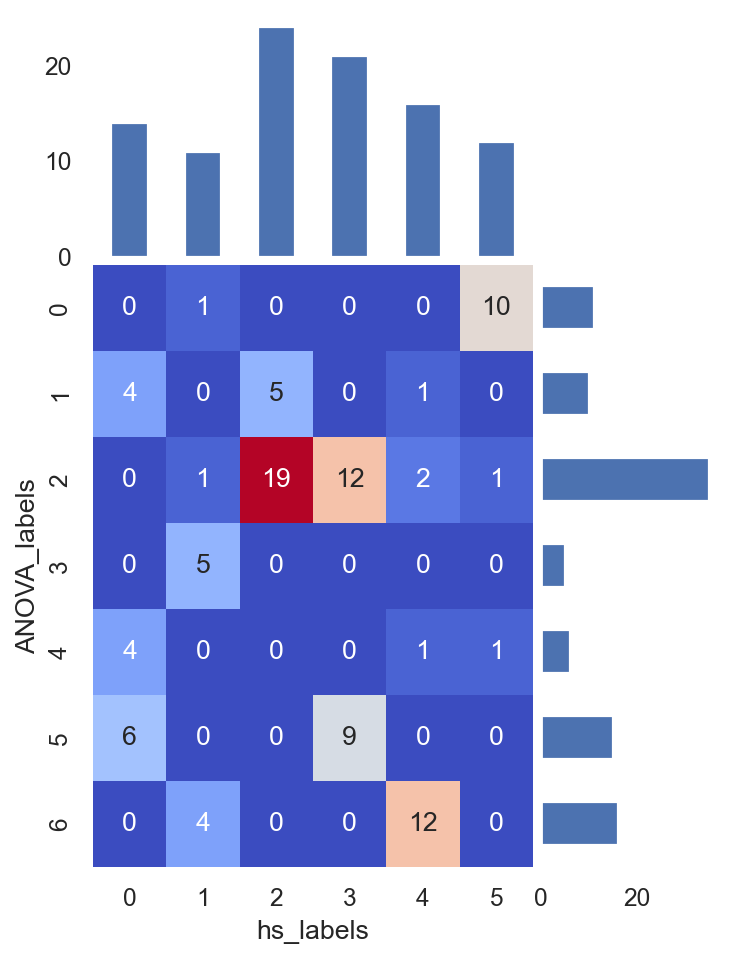

In [165]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(5, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

# Functional analysis

In [166]:
gene_clust = list()
enrich_results = list()

for label in tqdm(sorted(labels.unique())):
    genes = labels[labels == label].index.tolist()
    descr = f'Genes for spectral clustering ({n_clusters} clusters) of human-specific genes. Cluster label: {label}'
    gene_clust.append(GeneCluster(genes, descr, label, background_genes))
    time.sleep(1)

  0%|          | 0/6 [00:00<?, ?it/s]

## GO_Biological_Process_2021

In [167]:
db_name = 'GO_Biological_Process_2021'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [168]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
negative regulation of vascular associated smoo...     1  0.005188   
positive regulation of B cell receptor signalin...     2  0.007773   
positive regulation of vascular associated smoo...     3  0.010352   
zinc ion import across plasma membrane (GO:0071...     4  0.010352   
myelin maintenance (GO:0043217)                        5  0.010352   

                                                       Z-score  \
Term                                                             
negative regulation of vascular associated smoo...  413.461538   
positive regulation of B cell receptor signalin...  206.692308   
positive regulation of vascular associated smoo...  137.769231   
zinc ion import across plasma membrane (GO:0071...  137.769231   
myelin maintenance (GO:0043217)                     137.769231   

                                                    Combined score  \
Term                                                                 
negative regulation of vascular associated smoo...     2175.351938   
positive regulation of B cell receptor signalin...     1003.916083   
positive regulation of vascular associated smoo...      629.685118   
zinc ion import across plasma membrane (GO:0071...      629.685118   
myelin maintenance (GO:0043217)                         629.685118   

                                                   Overlapping genes  \
Term                                                                   
negative regulation of vascular associated smoo...            [FGF9]   
positive regulation of B cell receptor signalin...        [SLC39A10]   
positive regulation of vascular associated smoo...            [FGF9]   
zinc ion import across plasma membrane (GO:0071...        [SLC39A10]   
myelin maintenance (GO:0043217)                            [EPB41L3]   

                                                    Adjusted P-value  \
Term                                                                   
negative regulation of vascular associated smoo...          0.139892   
positive regulation of B cell receptor signalin...          0.139892   
positive regulation of vascular associated smoo...          0.139892   
zinc ion import across plasma membrane (GO:0071...          0.139892   
myelin maintenance (GO:0043217)                             0.139892   

                                                    Old p-value  \
Term                                                              
negative regulation of vascular associated smoo...            0   
positive regulation of B cell receptor signalin...            0   
positive regulation of vascular associated smoo...            0   
zinc ion import across plasma membrane (GO:0071...            0   
myelin maintenance (GO:0043217)                               0   

                                                    Old adjusted p-value  \
Term                                                                       
negative regulation of vascular associated smoo...                     0   
positive regulation of B cell receptor signalin...                     0   
positive regulation of vascular associated smoo...                     0   
zinc ion import across plasma membrane (GO:0071...                     0   
myelin maintenance (GO:0043217)                                        0   

                                                    num_overlap_genes  \
Term                                                                    
negative regulation of vascular associated smoo...                  1   
positive regulation of B cell receptor signalin...                  1   
positive regulation of vascular associated smoo...                  1   
zinc ion import across plasma membrane (GO:0071...                  1   
myelin maintenance (GO:0043217)                                     1   

                                                    neg_log10(p_adj)  \
Term      

In [169]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 15)].index.unique()
terms.size

29

In [170]:
enrich_res[enrich_res.cluster_label == 5]

Rank     p-val   Z-score  \
Term                                                                           
carnitine transport (GO:0015879)                       1  0.002226       inf   
quaternary ammonium group transport (GO:0015697)       2  0.002226       inf   
L-arginine transmembrane transport (GO:1903400)        3  0.002226       inf   
L-ornithine transmembrane transport (GO:1903352)       4  0.002226       inf   
amino-acid betaine transport (GO:0015838)              5  0.002226       inf   
...                                                  ...       ...       ...   
regulation of apoptotic process (GO:0042981)          91  0.442634  1.826381   
positive regulation of transcription by RNA pol...    92  0.464405  1.706551   
negative regulation of transcription, DNA-templ...    93  0.513744  1.471101   
positive regulation of transcription, DNA-templ...    94  0.575431  1.230467   
regulation of transcription by RNA polymerase I...    95  0.734269  0.779036   

                                                    Combined score  \
Term                                                                 
carnitine transport (GO:0015879)                               inf   
quaternary ammonium group transport (GO:0015697)               inf   
L-arginine transmembrane transport (GO:1903400)                inf   
L-ornithine transmembrane transport (GO:1903352)               inf   
amino-acid betaine transport (GO:0015838)                      inf   
...                                                            ...   
regulation of apoptotic process (GO:0042981)              1.488521   
positive regulation of transcription by RNA pol...        1.308920   
negative regulation of transcription, DNA-templ...        0.979799   
positive regulation of transcription, DNA-templ...        0.680000   
regulation of transcription by RNA polymerase I...        0.240629   

                                                   Overlapping genes  \
Term                                                                   
carnitine transport (GO:0015879)                          [SLC25A29]   
quaternary ammonium group transport (GO:0015697)          [SLC25A29]   
L-arginine transmembrane transport (GO:1903400)           [SLC25A29]   
L-ornithine transmembrane transport (GO:1903352)          [SLC25A29]   
amino-acid betaine transport (GO:0015838)                 [SLC25A29]   
...                                                              ...   
regulation of apoptotic process (GO:0042981)                 [SIAH1]   
positive regulation of transcription by RNA pol...         [SMARCA1]   
negative regulation of transcription, DNA-templ...          [ZNF706]   
positive regulation of transcription, DNA-templ...         [SMARCA1]   
regulation of transcription by RNA polymerase I...         [SMARCA1]   

                                                    Adjusted P-value  \
Term                                                                   
carnitine transport (GO:0015879)                            0.042300   
quaternary ammonium group transport (GO:0015697)            0.042300   
L-arginine transmembrane transport (GO:1903400)             0.042300   
L-ornithine transmembrane transport (GO:1903352)            0.042300   
amino-acid betaine transport (GO:0015838)                   0.042300   
...                                                              ...   
regulation of apoptotic process (GO:0042981)                0.462091   
positive regulation of transcription by RNA pol...          0.479549   
negative regulation of transcription, DNA-templ...          0.524792   
positive regulation of transcription, DNA-templ...          0.581553   
regulation of transcription by RNA polymerase I...          0.734269   

                                                    Old p-value  \
Term                                                              
carnitine transport (GO:0015879)                              0   
quaternary ammonium group

In [171]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

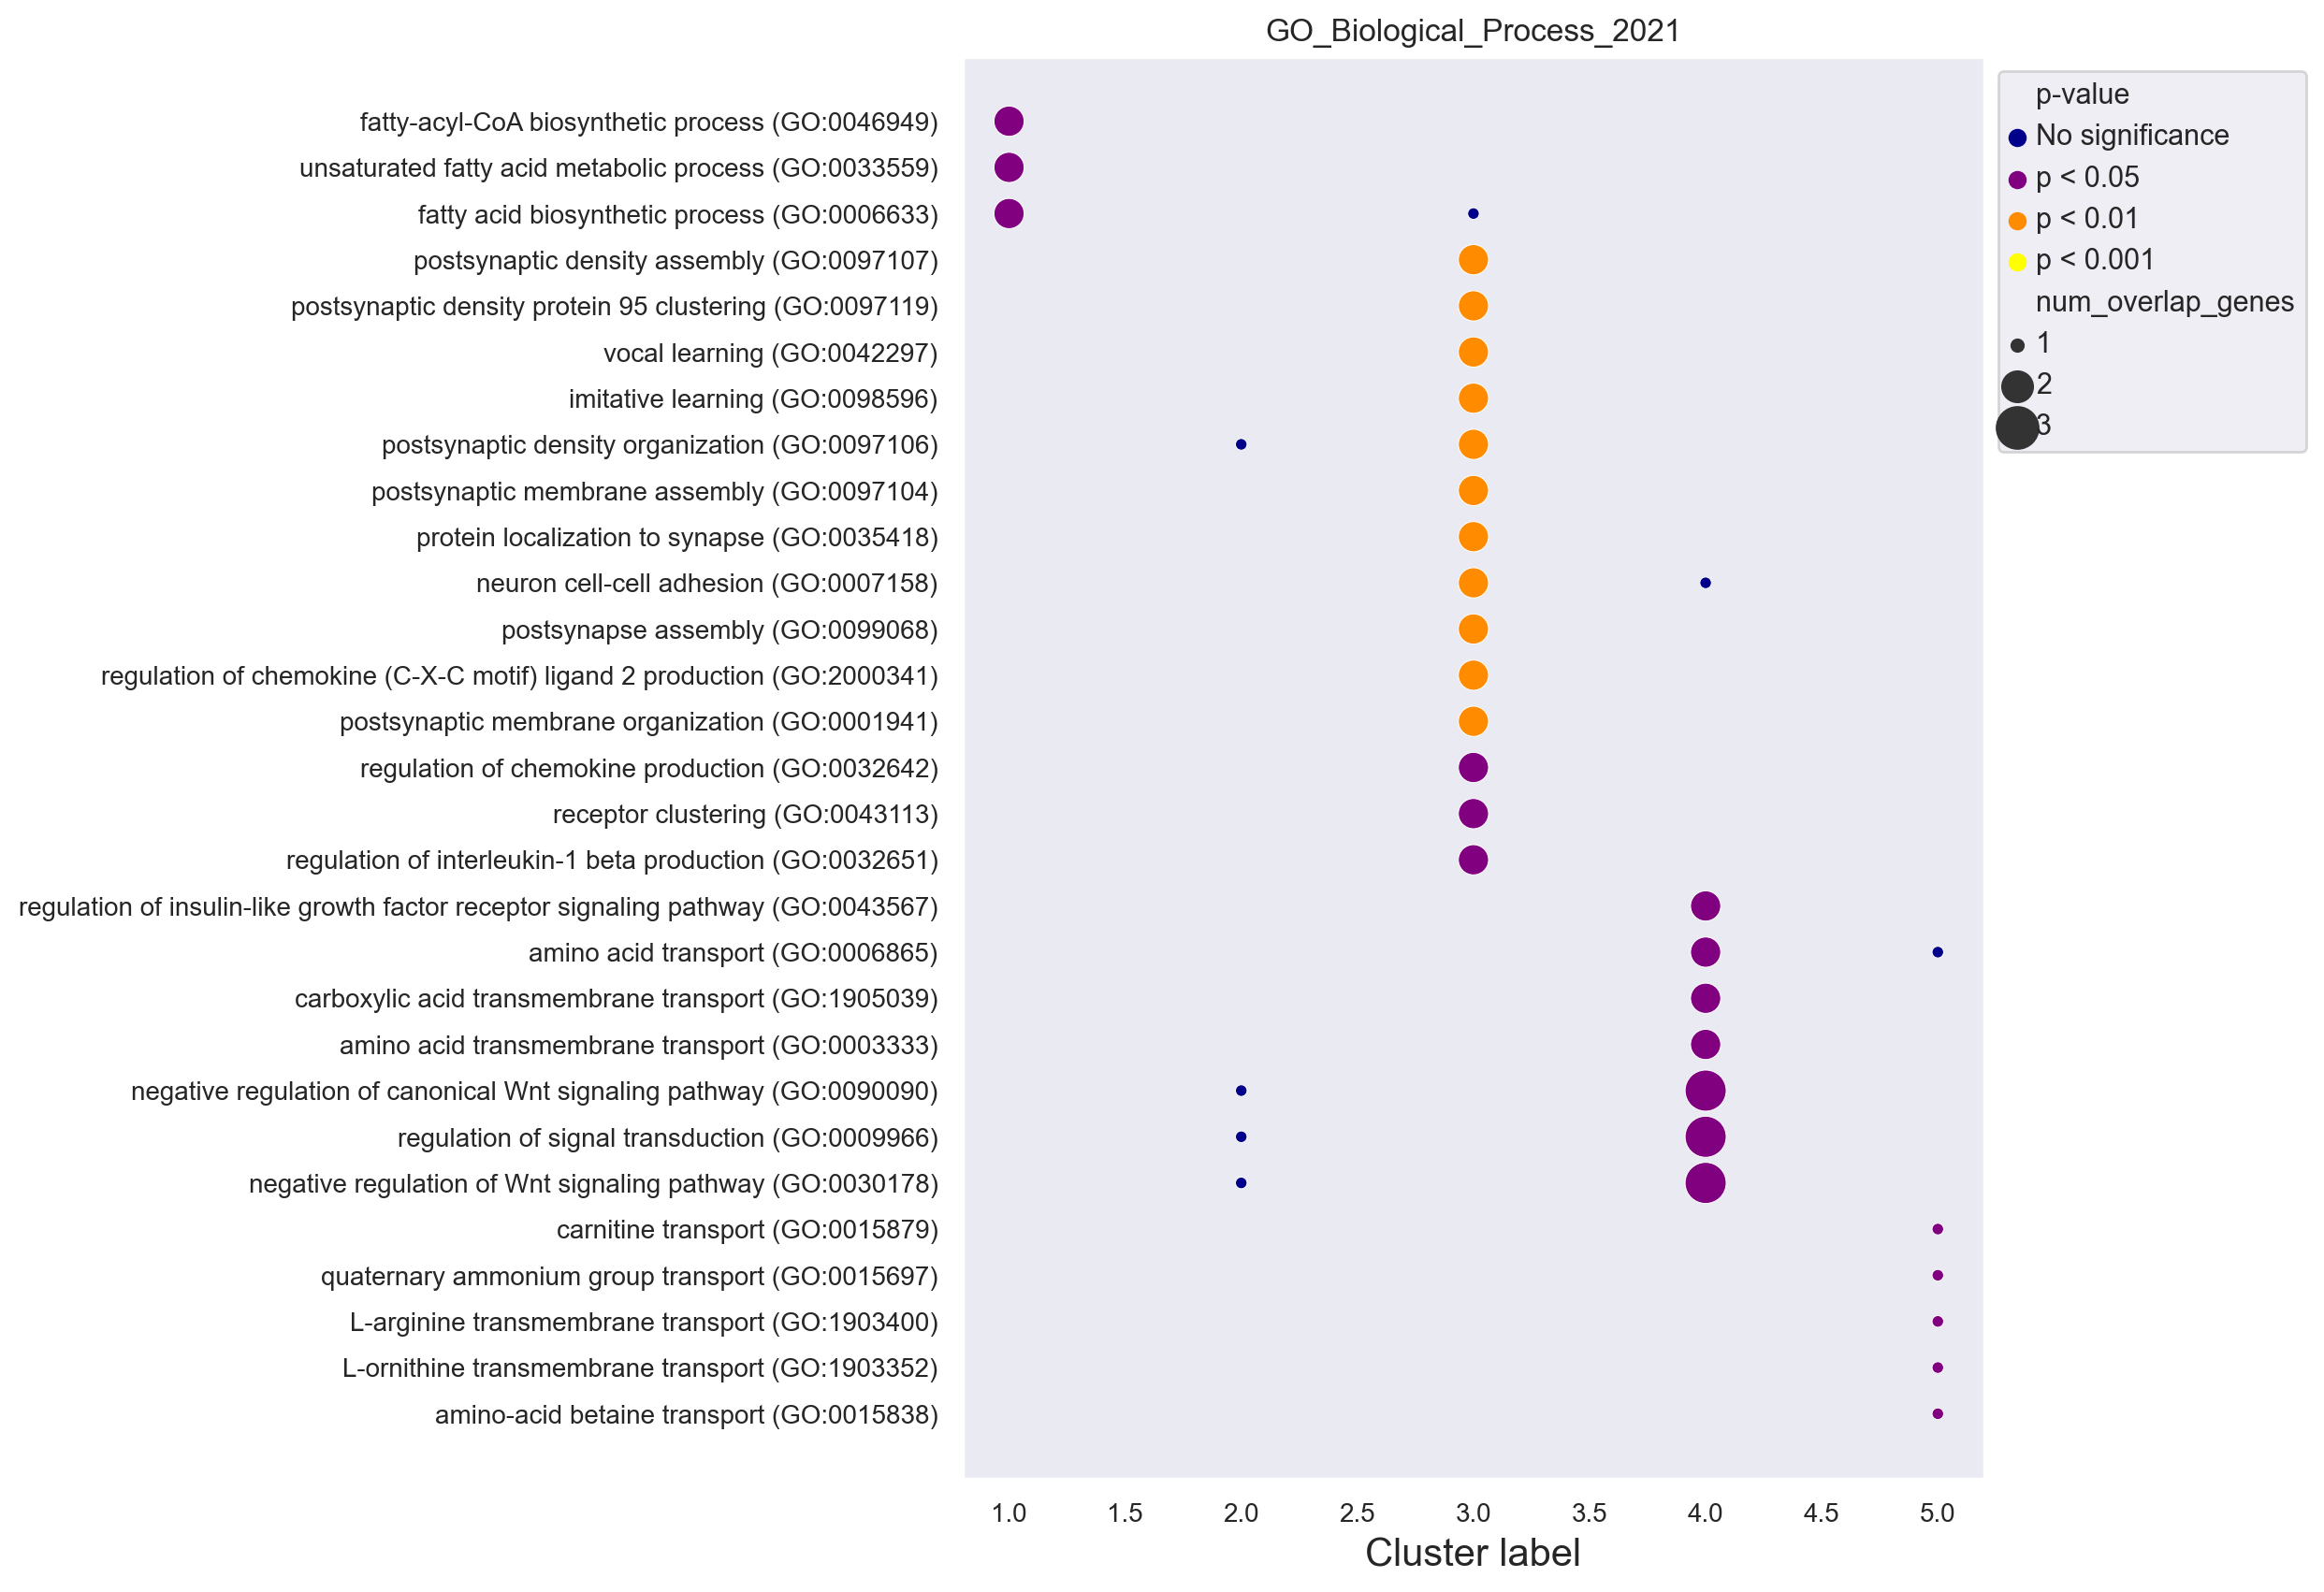

In [172]:
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Azimuth Cell Types 2021


In [173]:
db_name = 'Azimuth_Cell_Types_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [174]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
Intermediate B Cell, Kappa Light Chain CL0000785      1  0.002041         inf   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...    1  0.000057  487.727273   
Glutamatergic Neuron CL0000679                        2  0.000282  121.863636   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617    3  0.008886  233.260870   
Layer 6 Glutamatergic Neuron, Intratelencephalo...    4  0.008886  233.260870   

                                                    Combined score  \
Term                                                                 
Intermediate B Cell, Kappa Light Chain CL0000785               inf   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...     4767.547232   
Glutamatergic Neuron CL0000679                          996.082856   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617     1101.748622   
Layer 6 Glutamatergic Neuron, Intratelencephalo...     1101.748622   

                                                   Overlapping genes  \
Term                                                                   
Intermediate B Cell, Kappa Light Chain CL0000785            [MARCKS]   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...    [RALYL, PDE1A]   
Glutamatergic Neuron CL0000679                      [RALYL, KHDRBS3]   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617           [PCDH9]   
Layer 6 Glutamatergic Neuron, Intratelencephalo...           [PTPRK]   

                                                    Adjusted P-value  \
Term                                                                   
Intermediate B Cell, Kappa Light Chain CL0000785            0.002041   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...          0.001251   
Glutamatergic Neuron CL0000679                              0.003102   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617          0.013934   
Layer 6 Glutamatergic Neuron, Intratelencephalo...          0.013934   

                                                   Old p-value  \
Term                                                             
Intermediate B Cell, Kappa Light Chain CL0000785             0   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...           0   
Glutamatergic Neuron CL0000679                               0   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617           0   
Layer 6 Glutamatergic Neuron, Intratelencephalo...           0   

                                                   Old adjusted p-value  \
Term                                                                      
Intermediate B Cell, Kappa Light Chain CL0000785                      0   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...                    0   
Glutamatergic Neuron CL0000679                                        0   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617                    0   
Layer 6 Glutamatergic Neuron, Intratelencephalo...                    0   

                                                   num_overlap_genes  \
Term                                                                   
Intermediate B Cell, Kappa Light Chain CL0000785                   1   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...                 2   
Glutamatergic Neuron CL0000679                                     2   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617                 1   
Layer 6 Glutamatergic Neuron, Intratelencephalo...                 1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Intermediate B Cell, Kappa Light Chain CL0000785            2.690204   
FEZF2+ PKD2L1+ Layer 5 Glutamatergic Neuron CL0...          2.902818   
Glutamatergic Neuron CL0000679                              2.508422   
SST+ OR5AH1P+ Layer 3-5 GABAergic Neuron CL0000617          1.855912   
Layer 6 Glutamatergic Neuron, Intratelencephalo...      

In [175]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

25

In [176]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

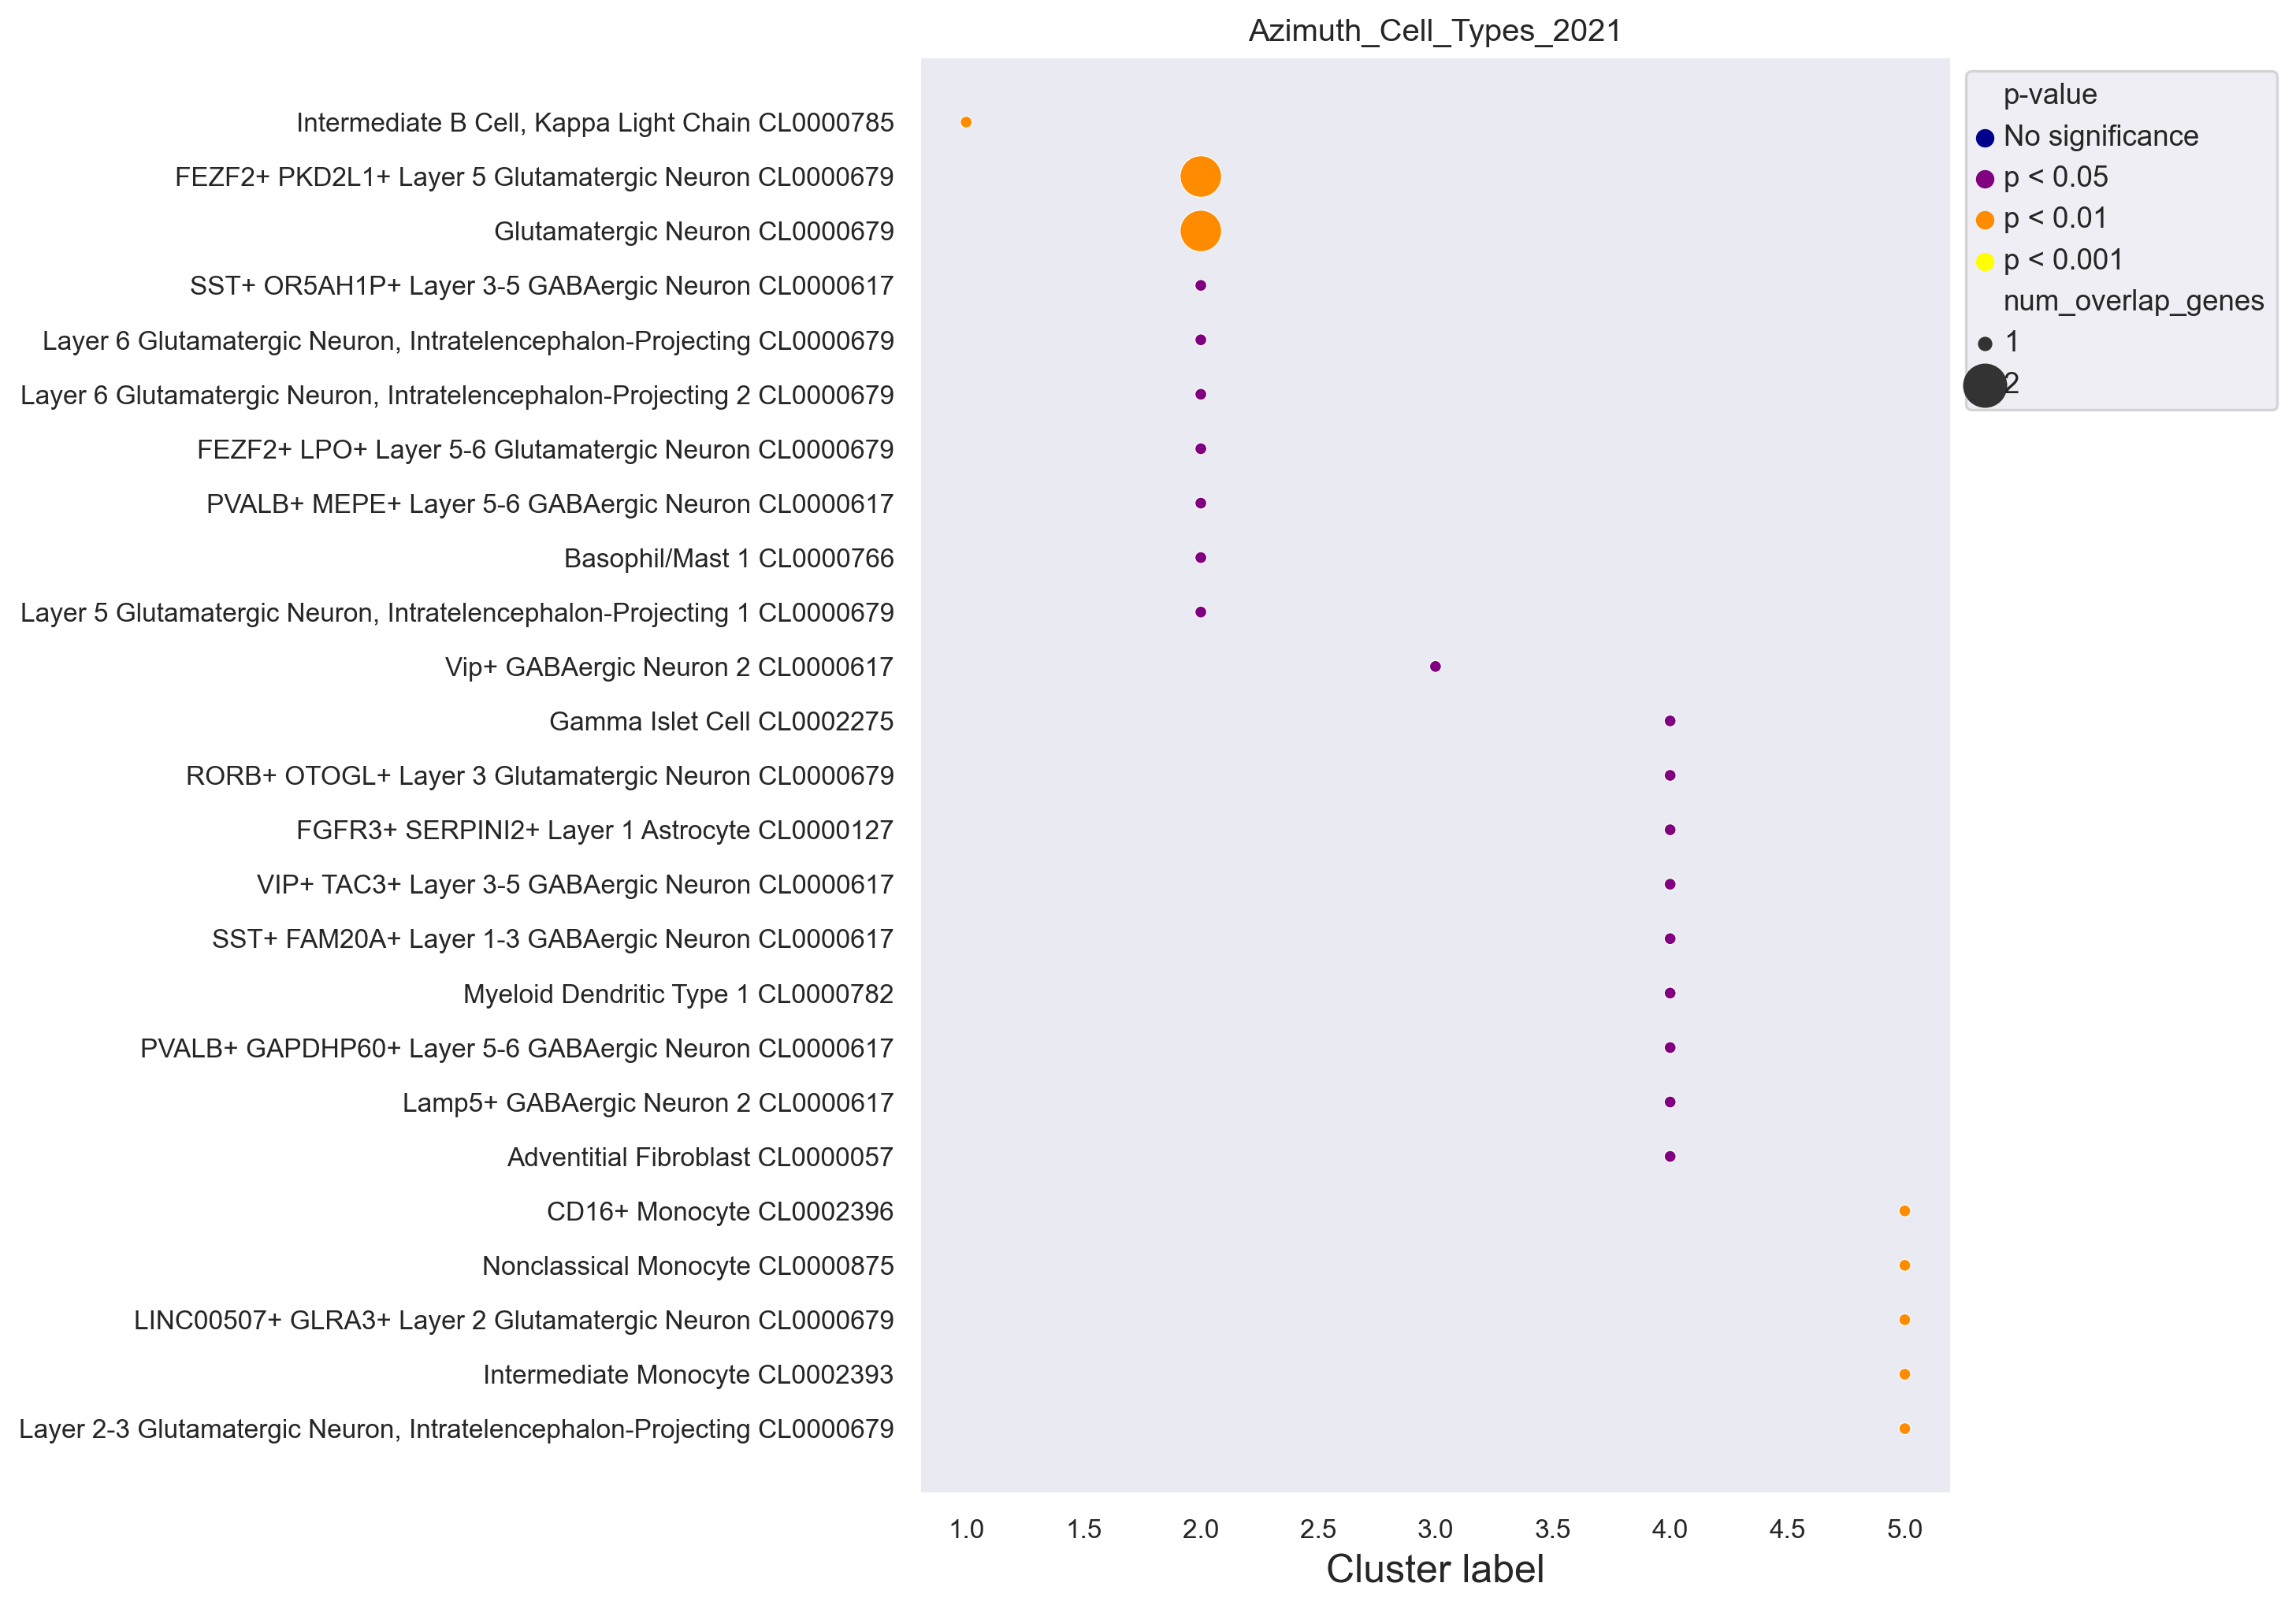

In [177]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Cell types from MTG

In [178]:
# load celltypes from DOI: 10.1126/science.ade9516
cell_types_df = pd.read_csv('results/constypes.csv')
# Replace incorrect cell-type name
cell_types_df.cluster.replace({'L56ITCar31': 'L6ITCar31', 'L56ITCar32': 'L6ITCar32'}, inplace=True)

In [179]:
# load celltype information from DOI: 10.1126/science.ade9516
cell_type_colors = pd.read_csv('results/colors.csv', index_col=2)
cell_type_colors = cell_type_colors['subclass_color']
# replace all non-matching symbols
cell_type_colors.index = cell_type_colors.index.str.replace(' ', '').str.replace('_', '').str.replace('/', '').str.replace('-', '')

<Axes: xlabel='count', ylabel='cluster'>

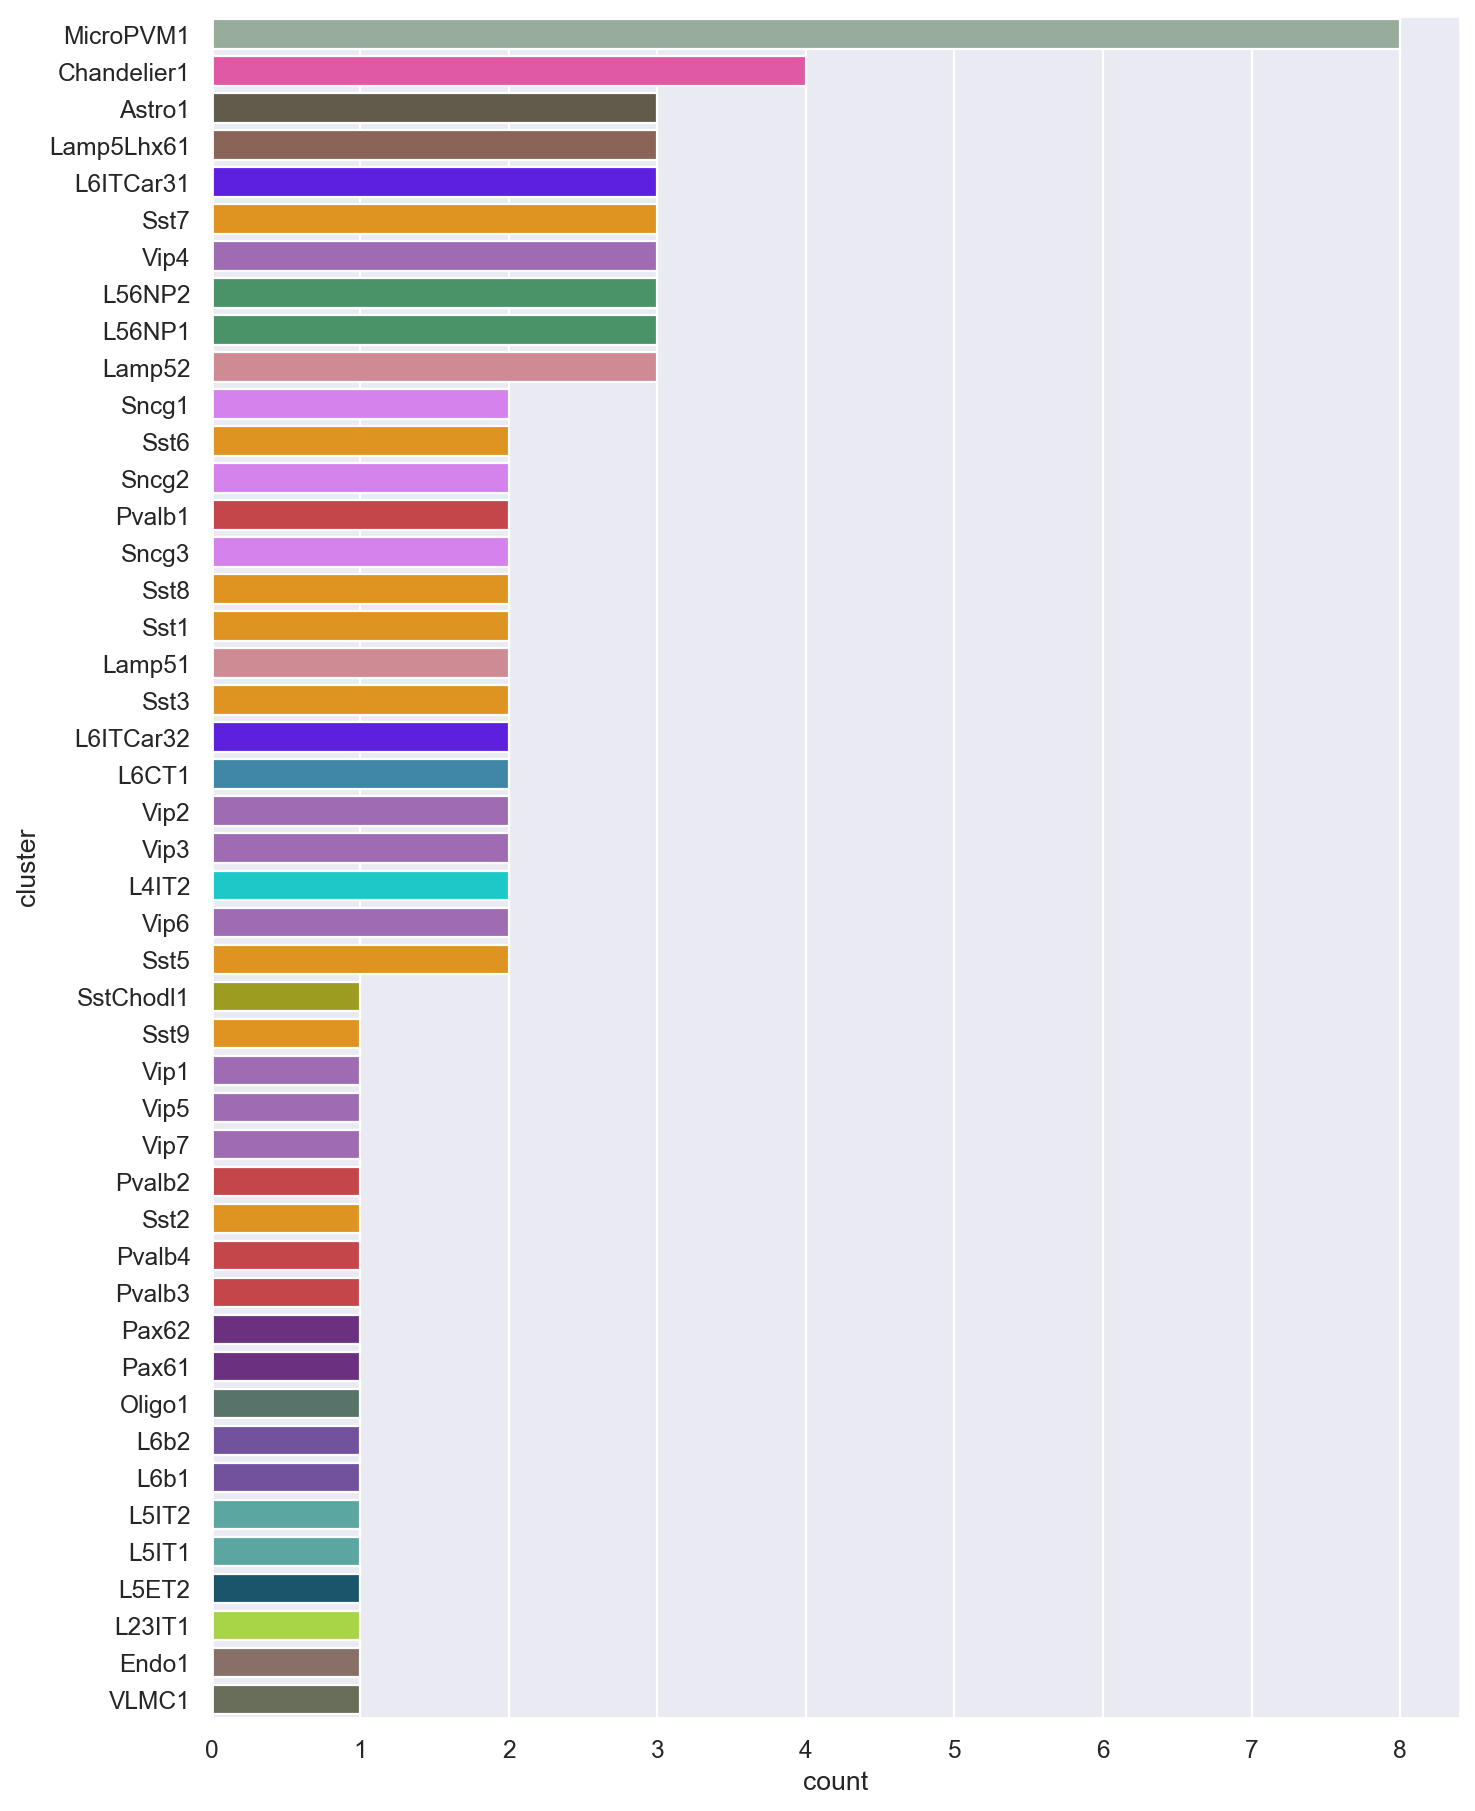

In [180]:
fig, axes = plt.subplots(figsize=(10, 14))
cell_types_df_hum = cell_types_df[cell_types_df.species == 'human']
count_df = cell_types_df_hum[(cell_types_df_hum.gene.isin(hs_genes)) & (cell_types_df_hum.log2FoldChange.abs() > 2)].cluster.value_counts()
cell_type_colors_pal = cell_type_colors.to_dict()
sns.barplot(count_df.to_frame().reset_index(), y='cluster', x='count', ax=axes, palette=cell_type_colors_pal)

In [181]:
index = cell_types_df_hum.cluster.unique()
cluster_celltype = pd.DataFrame(index=index)

for label in sorted(labels.unique()):
    genes = labels[labels == label].index.tolist()
    counts = cell_types_df_hum[cell_types_df_hum.gene.isin(genes)].cluster.value_counts(sort=False)
    cluster_celltype[f'cluster {label}'] = 0
    cluster_celltype.loc[counts.index, f'cluster {label}'] = counts
cluster_celltype.head()

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5
Astro1               0          3          1          5          1          1
Chandelier1          2          2          3          4          2          0
Endo1                1          1          0          1          0          0
L23IT1               2          3          1          1          2          0
L23IT2               1          3          0          1          1          0

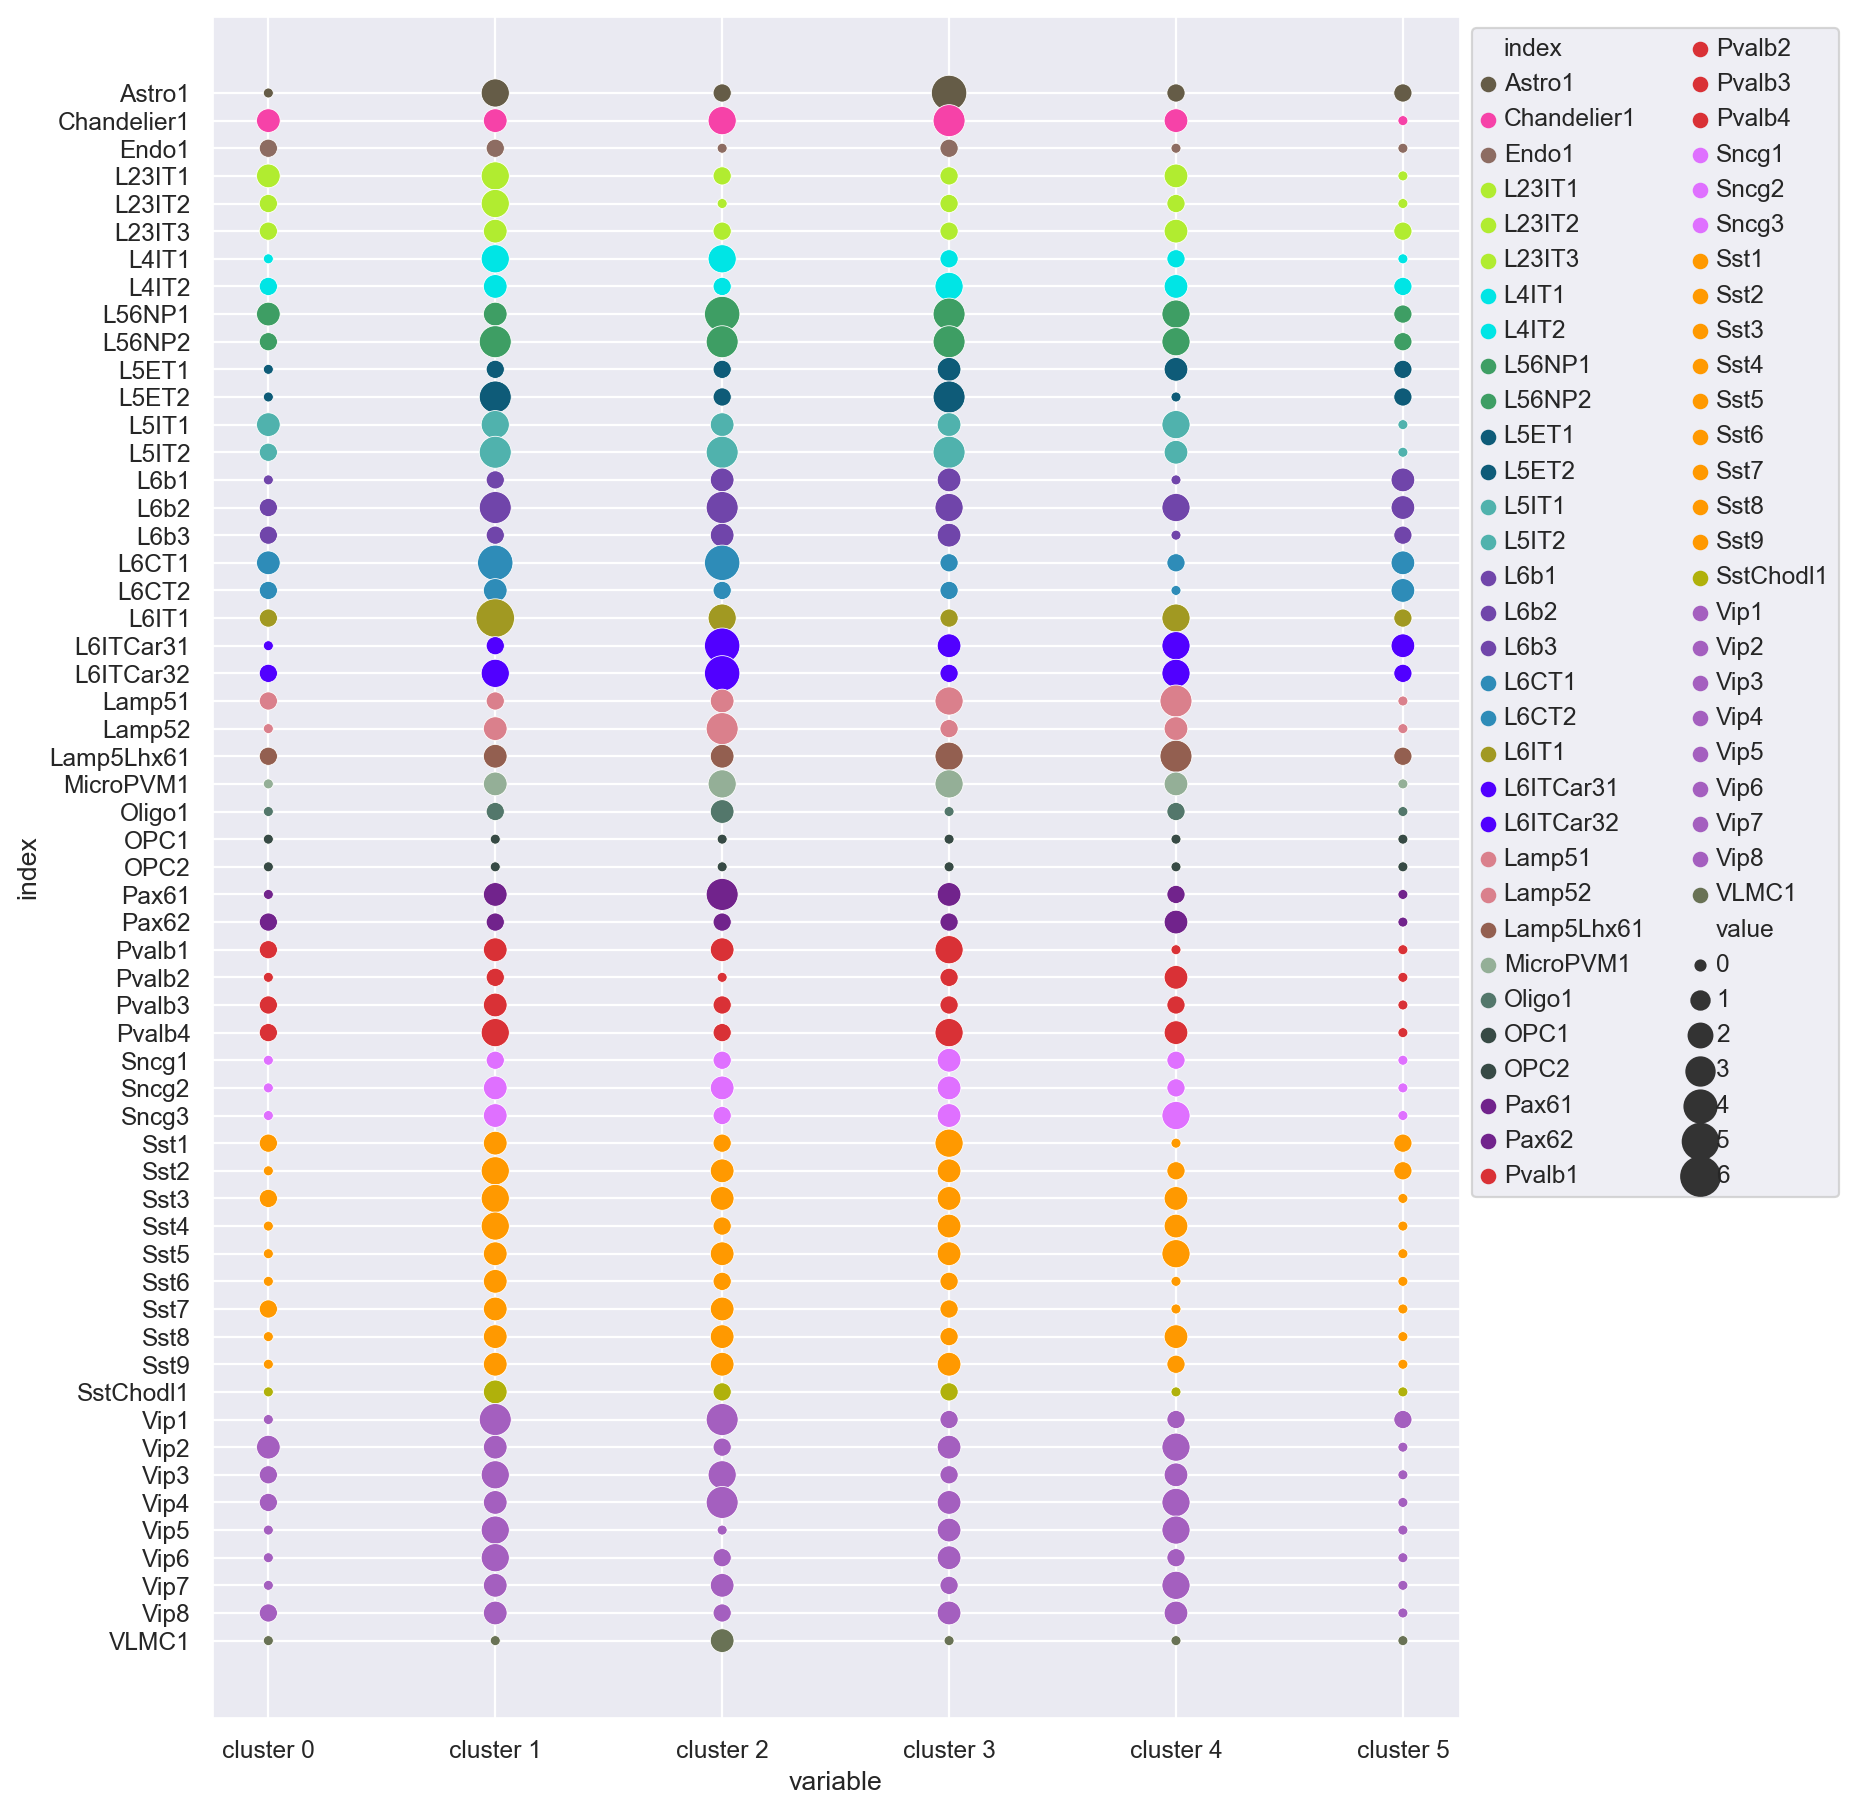

In [182]:
fig, axes = plt.subplots(figsize=(10, 14))
cell_type_count = cluster_celltype.reset_index().melt(id_vars=['index'], value_vars=cluster_celltype.columns)
sns.scatterplot(cell_type_count,
                y='index',
                x='variable',
                size='value',
                palette=cell_type_colors_pal,
                hue='index',
                sizes=(20, 300))
axes.legend(ncols=2, loc="upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [183]:
import gseapy
#gseapy.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2

In [184]:
def enrich_genes(gene_list, gene_sets, label):
    results = gseapy.enrich(gene_list=gene_list, # or gene_list=glist
                           gene_sets=gene_sets, # kegg is a dict object
                           background=background_genes, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
                           outdir=None,
                           verbose=True).results
    results[f'cluster_label'] = label
    results['num_overlap_genes'] = results.Overlap.apply(lambda x: x.split('/')[0]).astype(int)
    return results

In [185]:
cell_types_genes = cell_types_df_hum.groupby('cluster').gene.apply(lambda x: list(x)).to_dict()

# check if calculated correctly
assert(cell_types_genes['Astro1'] == cell_types_df_hum[cell_types_df_hum.cluster == 'Astro1'].gene.to_list())

In [186]:
results = gseapy.enrich(gene_list=labels.index.to_list(), # or gene_list=glist
                           gene_sets=cell_types_genes, # kegg is a dict object
                           background=background_genes, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
                           outdir=None,
                           verbose=True).results

2023-11-25 00:00:50,977 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:50,979 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,008 [INFO] Done.


<Axes: title={'center': 'Cell types'}, xlabel='Combined Score'>

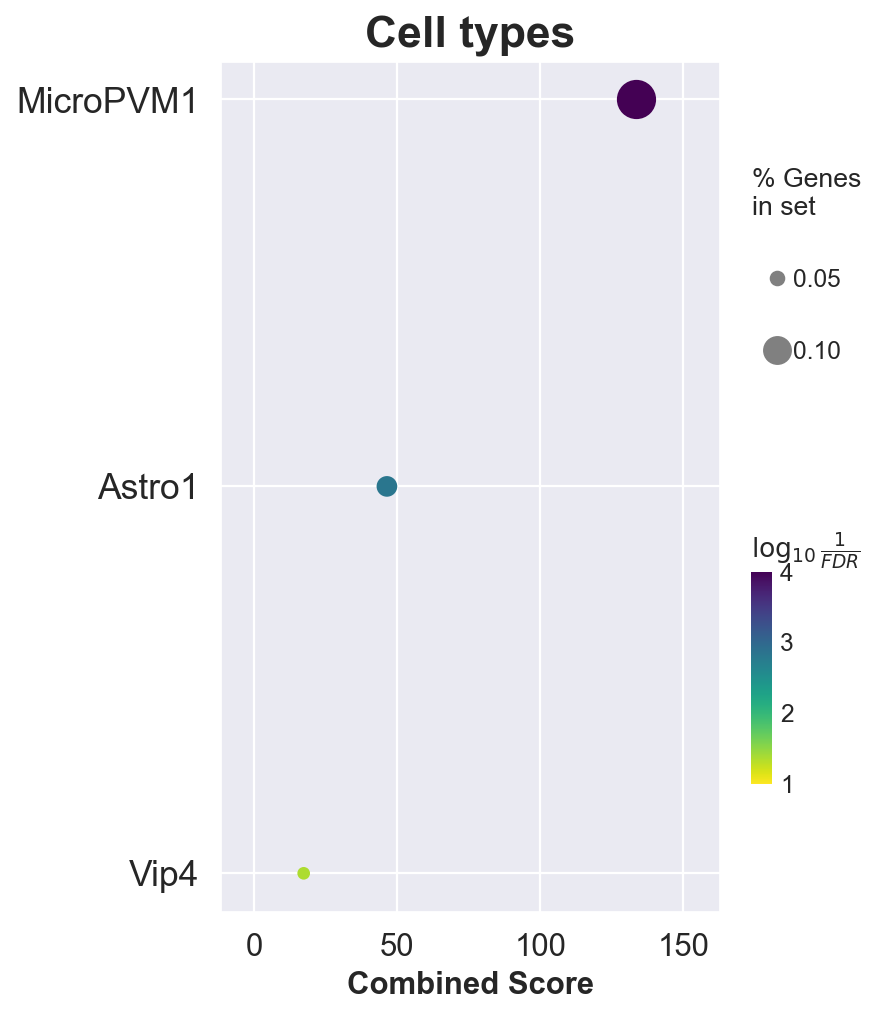

In [187]:
gseapy.dotplot(results, title='Cell types',cmap='viridis_r', size=20, figsize=(5, 7))

In [188]:
enrich_res = pd.concat([enrich_genes(labels[labels == label].index.tolist(), cell_types_genes, label) for label in range(n_clusters)])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

2023-11-25 00:00:51,416 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,417 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,435 [INFO] Done.
2023-11-25 00:00:51,438 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,440 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,471 [INFO] Done.
2023-11-25 00:00:51,473 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,475 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,499 [INFO] Done.
2023-11-25 00:00:51,502 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,503 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,524 [INFO] Done.
2023-11-25 00:00:51,527 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,529 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,553 [INFO] Done.
2023-11-25 00:00:51,556 [INFO] Input dict object named with gs_ind_0
2023-11-25 00:00:51,557 [INFO] Run: gs_ind_0 
2023-11-25 00:00:51,577 [INFO] Done.


Gene_set Overlap   P-value  Adjusted P-value  Odds Ratio  \
Term                                                                    
Chandelier1  gs_ind_0   2/484  0.362211          0.795087    2.025387   
Endo1        gs_ind_0    1/48  0.117843          0.795087   12.239404   
L23IT1       gs_ind_0   2/337  0.216773          0.795087    2.994667   
L23IT2       gs_ind_0   1/368  0.628898          0.795087    1.514398   
L23IT3       gs_ind_0   1/444  0.700322          0.795087    1.236470   

             Combined Score         Genes  cluster_label  num_overlap_genes  
Term                                                                         
Chandelier1        2.056835    ASAP2;FGF9              0                  2  
Endo1             26.172721         ASAP2              0                  1  
L23IT1             4.578565  EPB41L3;FGF9              0                  2  
L23IT2             0.702356          FGF9              0                  1  
L23IT3             0.440450          FGF9              0                  1

In [189]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

5

In [190]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

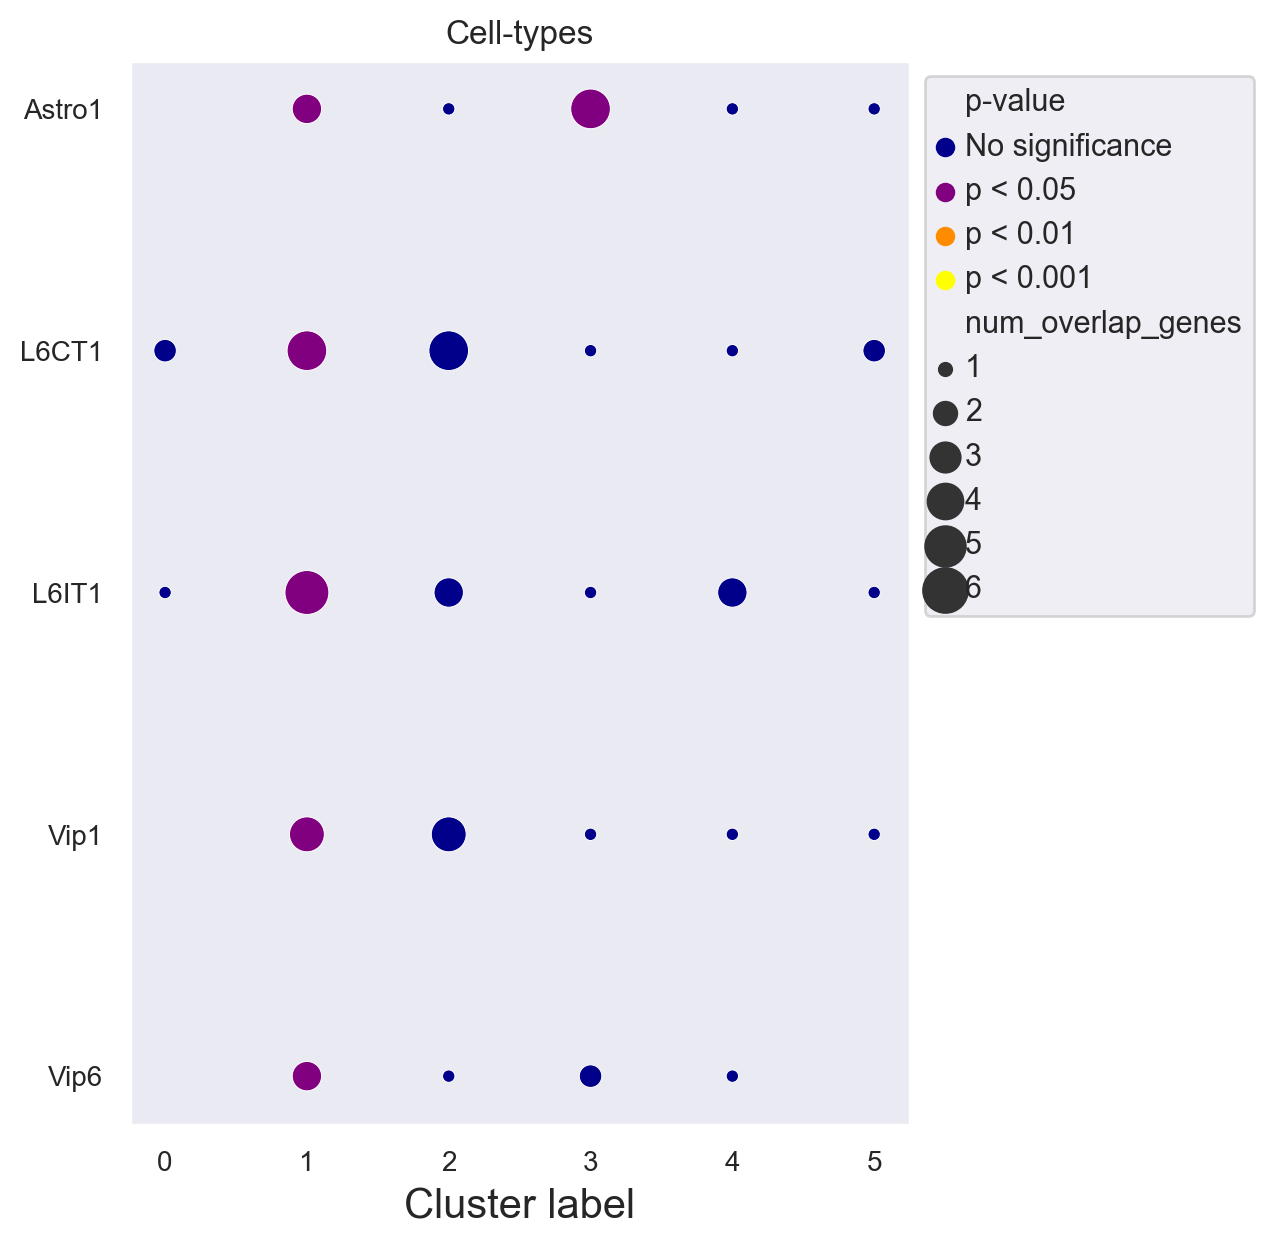

In [191]:
fig = plt.figure(figsize=(5, 7), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title('Cell-types')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Reactome_2022

In [192]:
db_name = 'Reactome_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [193]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
FGFR3b Ligand Binding And Activation R-HSA-190371     1  0.005188  413.461538   
FGFR2c Ligand Binding And Activation R-HSA-190375     2  0.007773  206.692308   
FGFR3 Ligand Binding And Activation R-HSA-190239      3  0.007773  206.692308   
FGFR3 Mutant Receptor Activation R-HSA-2033514        4  0.007773  206.692308   
FGFR4 Ligand Binding And Activation R-HSA-190322      5  0.007773  206.692308   

                                                   Combined score  \
Term                                                                
FGFR3b Ligand Binding And Activation R-HSA-190371     2175.351938   
FGFR2c Ligand Binding And Activation R-HSA-190375     1003.916083   
FGFR3 Ligand Binding And Activation R-HSA-190239      1003.916083   
FGFR3 Mutant Receptor Activation R-HSA-2033514        1003.916083   
FGFR4 Ligand Binding And Activation R-HSA-190322      1003.916083   

                                                  Overlapping genes  \
Term                                                                  
FGFR3b Ligand Binding And Activation R-HSA-190371            [FGF9]   
FGFR2c Ligand Binding And Activation R-HSA-190375            [FGF9]   
FGFR3 Ligand Binding And Activation R-HSA-190239             [FGF9]   
FGFR3 Mutant Receptor Activation R-HSA-2033514               [FGF9]   
FGFR4 Ligand Binding And Activation R-HSA-190322             [FGF9]   

                                                   Adjusted P-value  \
Term                                                                  
FGFR3b Ligand Binding And Activation R-HSA-190371          0.110237   
FGFR2c Ligand Binding And Activation R-HSA-190375          0.110237   
FGFR3 Ligand Binding And Activation R-HSA-190239           0.110237   
FGFR3 Mutant Receptor Activation R-HSA-2033514             0.110237   
FGFR4 Ligand Binding And Activation R-HSA-190322           0.110237   

                                                   Old p-value  \
Term                                                             
FGFR3b Ligand Binding And Activation R-HSA-190371            0   
FGFR2c Ligand Binding And Activation R-HSA-190375            0   
FGFR3 Ligand Binding And Activation R-HSA-190239             0   
FGFR3 Mutant Receptor Activation R-HSA-2033514               0   
FGFR4 Ligand Binding And Activation R-HSA-190322             0   

                                                   Old adjusted p-value  \
Term                                                                      
FGFR3b Ligand Binding And Activation R-HSA-190371                     0   
FGFR2c Ligand Binding And Activation R-HSA-190375                     0   
FGFR3 Ligand Binding And Activation R-HSA-190239                      0   
FGFR3 Mutant Receptor Activation R-HSA-2033514                        0   
FGFR4 Ligand Binding And Activation R-HSA-190322                      0   

                                                   num_overlap_genes  \
Term                                                                   
FGFR3b Ligand Binding And Activation R-HSA-190371                  1   
FGFR2c Ligand Binding And Activation R-HSA-190375                  1   
FGFR3 Ligand Binding And Activation R-HSA-190239                   1   
FGFR3 Mutant Receptor Activation R-HSA-2033514                     1   
FGFR4 Ligand Binding And Activation R-HSA-190322                   1   

                                                   neg_log10(p_adj)  \
Term                                                                  
FGFR3b Ligand Binding And Activation R-HSA-190371          0.957671   
FGFR2c Ligand Binding And Activation R-HSA-190375          0.957671   
FGFR3 Ligand Binding And Activation R-HSA-190239           0.957671   
FGFR3 Mutant Receptor Activation R-HSA-2033514             0.957671   
FGFR4 Ligand Binding And Activation R-HSA-190322           0.957671   

           

In [194]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

3

In [195]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

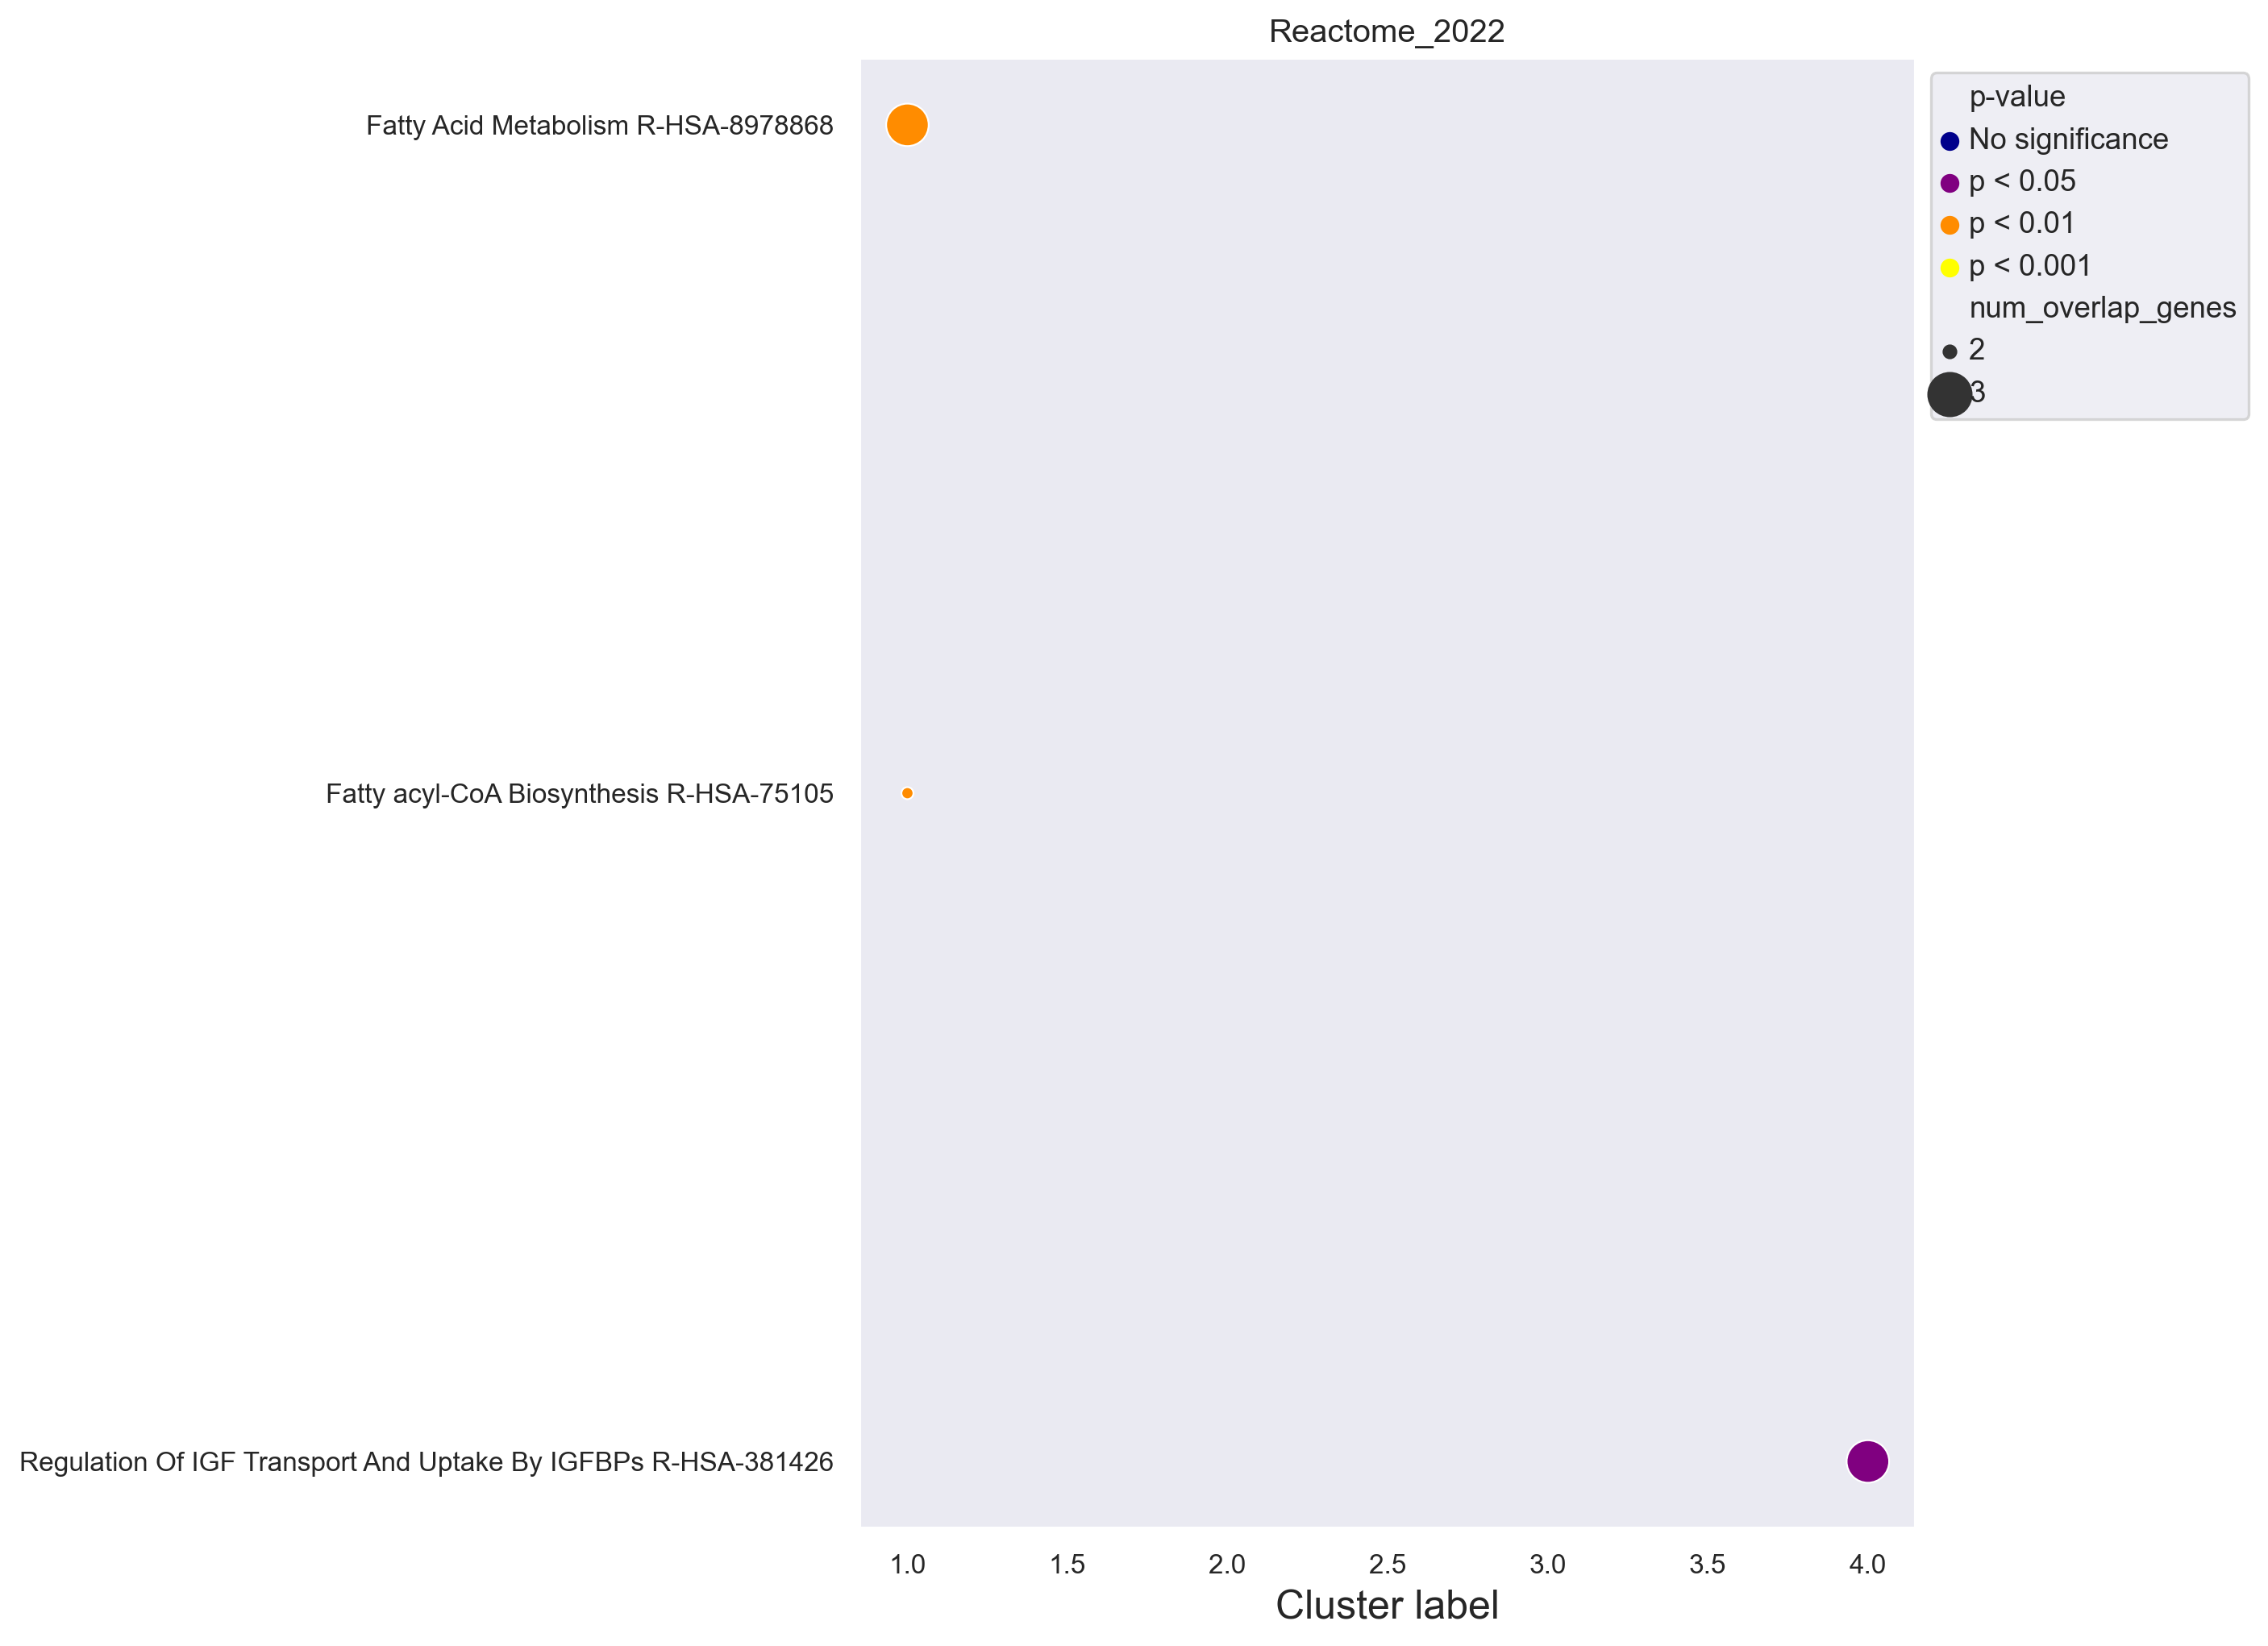

In [196]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## SynGO_2022

In [197]:
db_name = 'SynGO_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [198]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
Synaptic Vesicle (GO:0008021) CC                      1  0.023152   51.615385   
Postsynaptic Density (GO:0014069) CC                  2  0.136181    7.441958   
Postsynapse (GO:0098794) CC                           3  0.203951    4.731664   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...    1  0.000057  298.611111   
Anchored Component Of Presynaptic Membrane (GO:...    2  0.008140  179.200000   

                                                    Combined score  \
Term                                                                 
Synaptic Vesicle (GO:0008021) CC                        194.366582   
Postsynaptic Density (GO:0014069) CC                     14.837530   
Postsynapse (GO:0098794) CC                               7.522756   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...     2920.532479   
Anchored Component Of Presynaptic Membrane (GO:...      862.114431   

                                                   Overlapping genes  \
Term                                                                   
Synaptic Vesicle (GO:0008021) CC                              [WDR7]   
Postsynaptic Density (GO:0014069) CC                        [DYNLL2]   
Postsynapse (GO:0098794) CC                                 [DYNLL2]   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...     [RAB10, DNM2]   
Anchored Component Of Presynaptic Membrane (GO:...          [MARCKS]   

                                                    Adjusted P-value  \
Term                                                                   
Synaptic Vesicle (GO:0008021) CC                            0.069456   
Postsynaptic Density (GO:0014069) CC                        0.203951   
Postsynapse (GO:0098794) CC                                 0.203951   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...          0.000452   
Anchored Component Of Presynaptic Membrane (GO:...          0.032562   

                                                   Old p-value  \
Term                                                             
Synaptic Vesicle (GO:0008021) CC                             0   
Postsynaptic Density (GO:0014069) CC                         0   
Postsynapse (GO:0098794) CC                                  0   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...           0   
Anchored Component Of Presynaptic Membrane (GO:...           0   

                                                   Old adjusted p-value  \
Term                                                                      
Synaptic Vesicle (GO:0008021) CC                                      0   
Postsynaptic Density (GO:0014069) CC                                  0   
Postsynapse (GO:0098794) CC                                           0   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...                    0   
Anchored Component Of Presynaptic Membrane (GO:...                    0   

                                                   num_overlap_genes  \
Term                                                                   
Synaptic Vesicle (GO:0008021) CC                                   1   
Postsynaptic Density (GO:0014069) CC                               1   
Postsynapse (GO:0098794) CC                                        1   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...                 2   
Anchored Component Of Presynaptic Membrane (GO:...                 1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Synaptic Vesicle (GO:0008021) CC                            1.158289   
Postsynaptic Density (GO:0014069) CC                        0.690474   
Postsynapse (GO:0098794) CC                                 0.690474   
Presynaptic Dense Core Vesicle Exocytosis (GO:0...          3.344478   
Anchored Component Of Presynaptic Membrane (GO:...      

In [199]:
enrich_res[enrich_res.cluster_label == 2]

Rank     p-val     Z-score  \
Term                                                                            
Synaptic Vesicle Neurotransmitter Loading (GO:0...    1  0.013301  116.608696   
Extrinsic Component Of Postsynaptic Density Mem...    2  0.017697   77.724638   
Synaptic Vesicle Membrane (GO:0030672) CC             3  0.026432   46.617391   
Postsynapse Organization (GO:0099173) BP              4  0.039396   29.119565   
Synapse (GO:0045202) CC                               5  0.468995    1.634970   

                                                    Combined score  \
Term                                                                 
Synaptic Vesicle Neurotransmitter Loading (GO:0...      503.739638   
Extrinsic Component Of Postsynaptic Density Mem...      313.569593   
Synaptic Vesicle Membrane (GO:0030672) CC               169.368565   
Postsynapse Organization (GO:0099173) BP                 94.175073   
Synapse (GO:0045202) CC                                   1.237940   

                                                   Overlapping genes  \
Term                                                                   
Synaptic Vesicle Neurotransmitter Loading (GO:0...         [SLC17A7]   
Extrinsic Component Of Postsynaptic Density Mem...          [CNKSR2]   
Synaptic Vesicle Membrane (GO:0030672) CC                  [SLC17A7]   
Postsynapse Organization (GO:0099173) BP                    [CNKSR2]   
Synapse (GO:0045202) CC                                     [EIF4G3]   

                                                    Adjusted P-value  \
Term                                                                   
Synaptic Vesicle Neurotransmitter Loading (GO:0...          0.044054   
Extrinsic Component Of Postsynaptic Density Mem...          0.044054   
Synaptic Vesicle Membrane (GO:0030672) CC                   0.044054   
Postsynapse Organization (GO:0099173) BP                    0.049245   
Synapse (GO:0045202) CC                                     0.468995   

                                                   Old p-value  \
Term                                                             
Synaptic Vesicle Neurotransmitter Loading (GO:0...           0   
Extrinsic Component Of Postsynaptic Density Mem...           0   
Synaptic Vesicle Membrane (GO:0030672) CC                    0   
Postsynapse Organization (GO:0099173) BP                     0   
Synapse (GO:0045202) CC                                      0   

                                                   Old adjusted p-value  \
Term                                                                      
Synaptic Vesicle Neurotransmitter Loading (GO:0...                    0   
Extrinsic Component Of Postsynaptic Density Mem...                    0   
Synaptic Vesicle Membrane (GO:0030672) CC                             0   
Postsynapse Organization (GO:0099173) BP                              0   
Synapse (GO:0045202) CC                                               0   

                                                   num_overlap_genes  \
Term                                                                   
Synaptic Vesicle Neurotransmitter Loading (GO:0...                 1   
Extrinsic Component Of Postsynaptic Density Mem...                 1   
Synaptic Vesicle Membrane (GO:0030672) CC                          1   
Postsynapse Organization (GO:0099173) BP                           1   
Synapse (GO:0045202) CC                                            1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Synaptic Vesicle Neurotransmitter Loading (GO:0...          1.356014   
Extrinsic Component Of Postsynaptic Density Mem...          1.356014   
Synaptic Vesicle Membrane (GO:0030672) CC                   1.356014   
Postsynapse Organization (GO:0099173) BP                    1.307634   
Synapse (GO:0045202) CC                                 

In [200]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

16

In [201]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

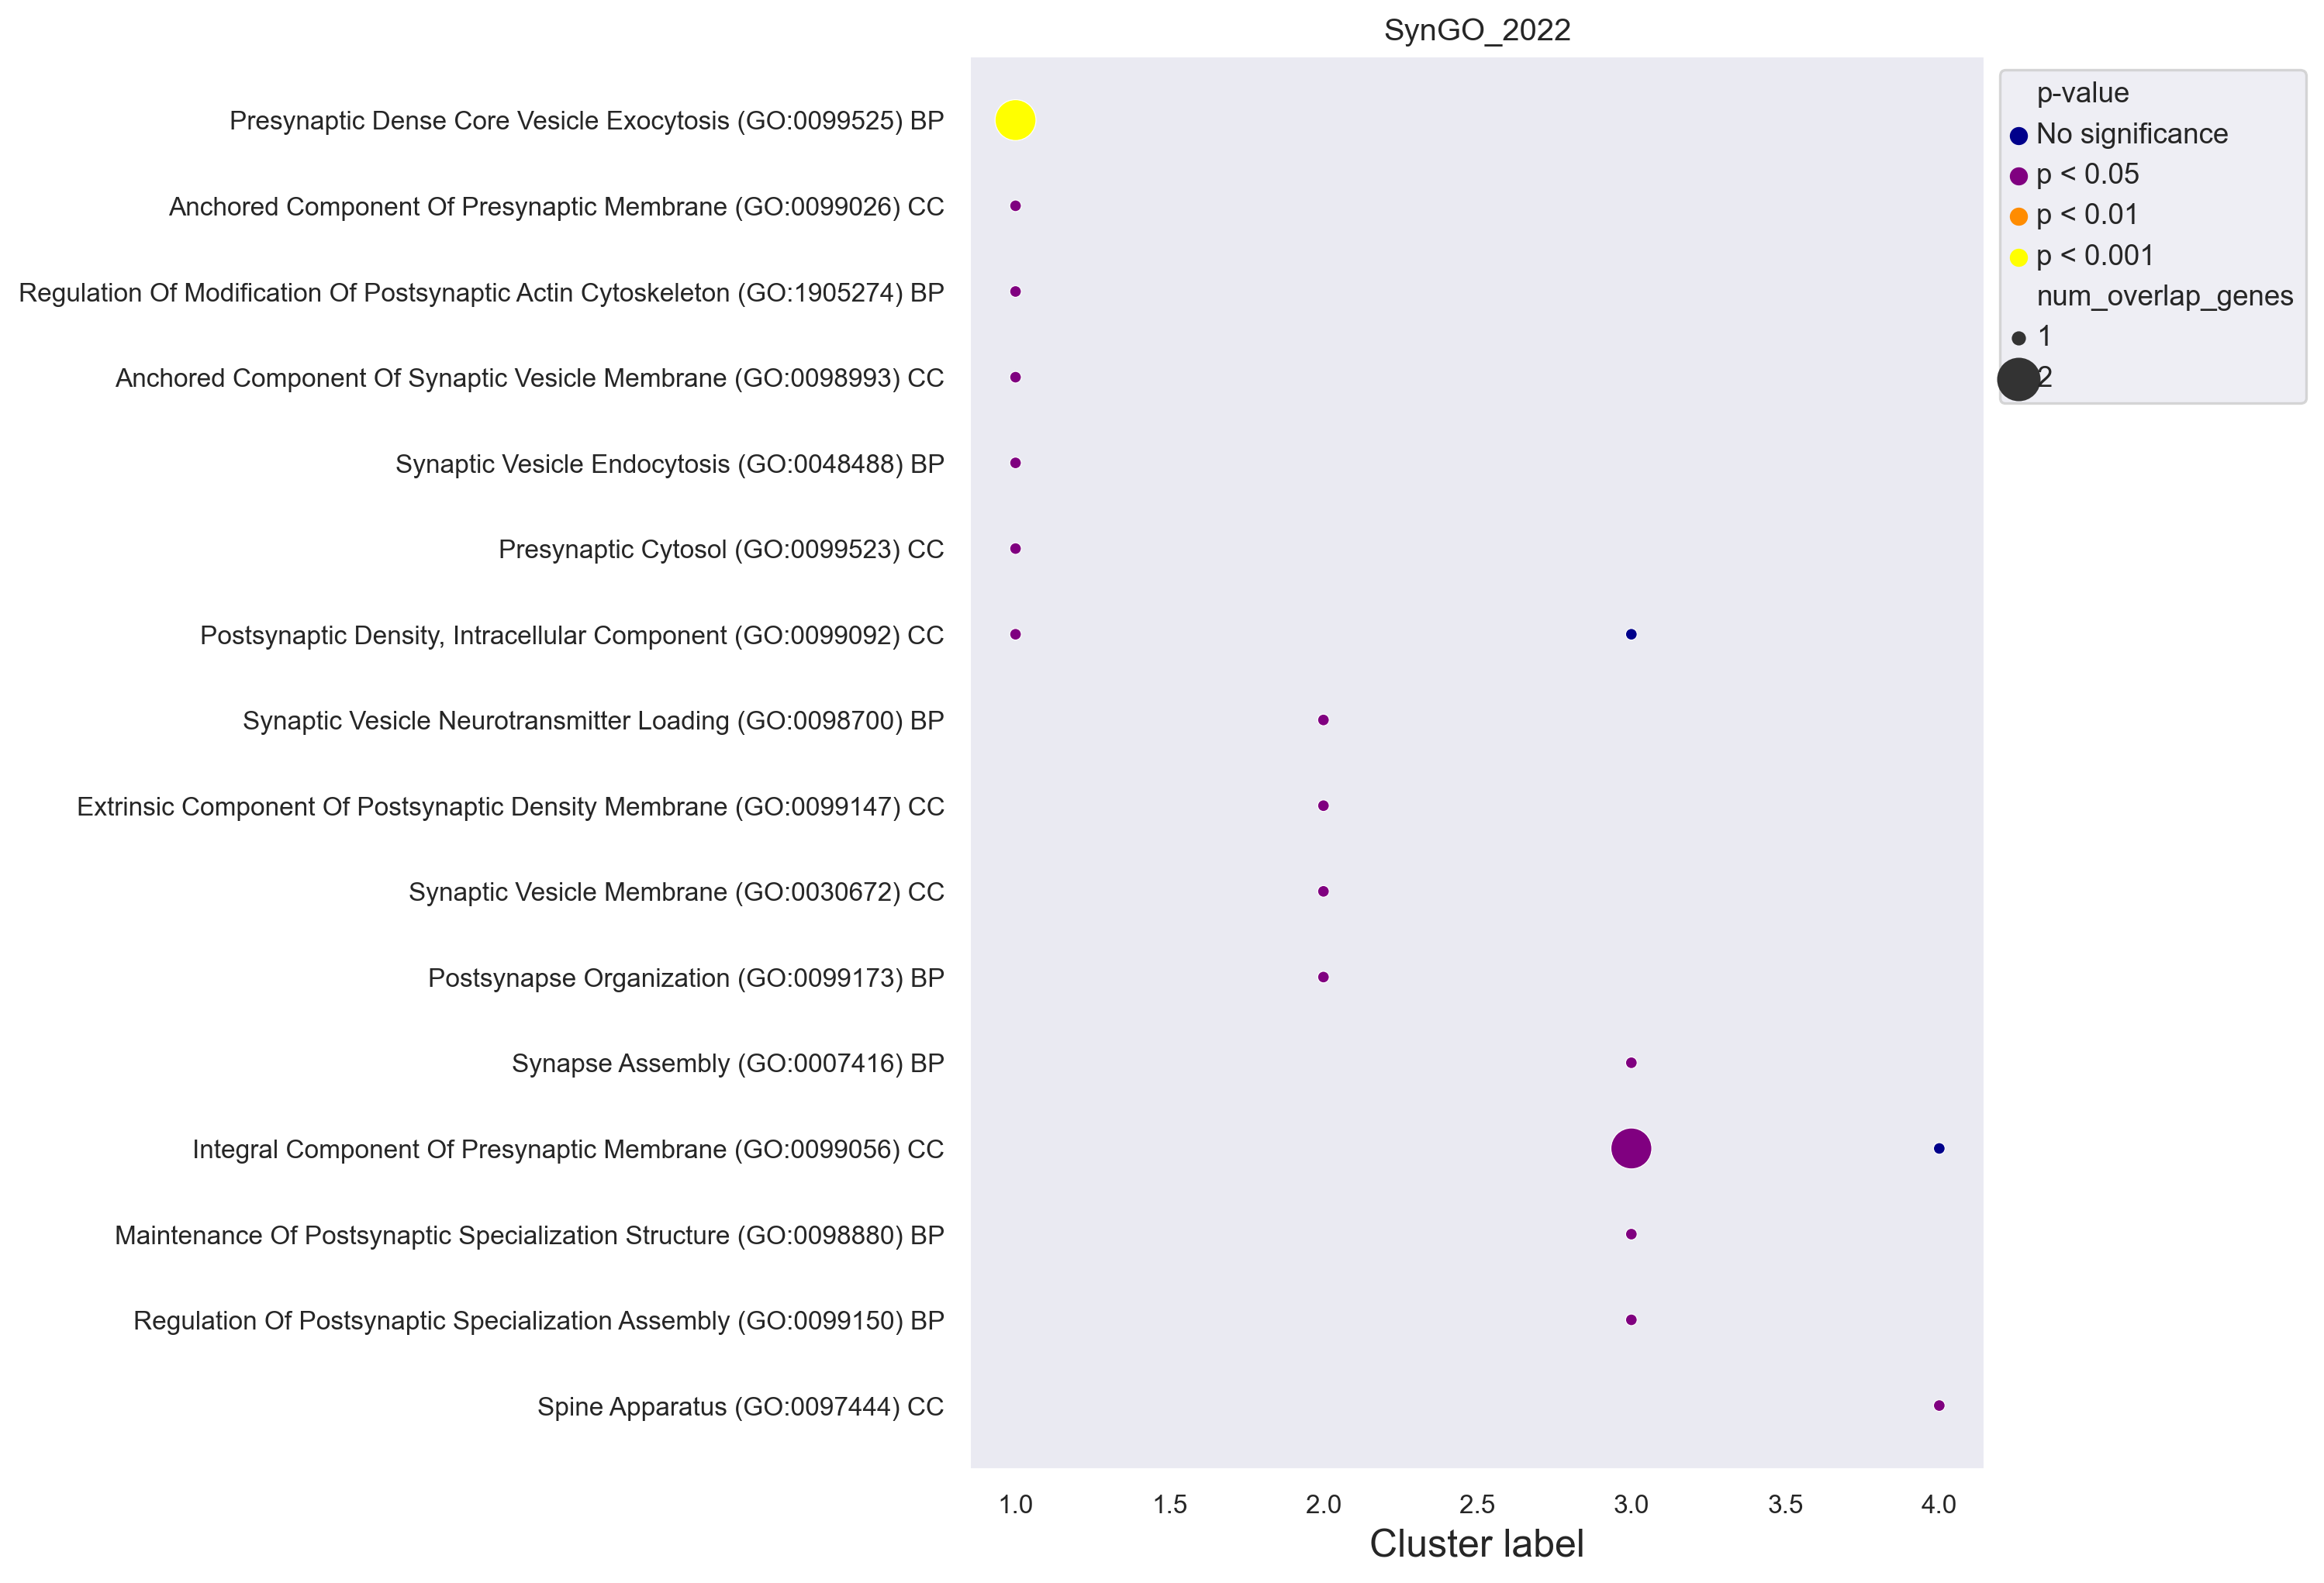

In [202]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## MGI_Mammalian_Phenotype_Level_4_2021

In [203]:
db_name = 'MGI_Mammalian_Phenotype_Level_4_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [204]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                       
abnormal temporal bone morphology MP:0005272     1  0.002597         inf   
abnormal Sertoli cell development MP:0004109     2  0.002597         inf   
abnormal internode morphology MP:0010738         3  0.002597         inf   
fused joints MP:0003189                          4  0.005188  413.461538   
calcified joint MP:0003200                       5  0.005188  413.461538   

                                              Combined score  \
Term                                                           
abnormal temporal bone morphology MP:0005272             inf   
abnormal Sertoli cell development MP:0004109             inf   
abnormal internode morphology MP:0010738                 inf   
fused joints MP:0003189                          2175.351938   
calcified joint MP:0003200                       2175.351938   

                                             Overlapping genes  \
Term                                                             
abnormal temporal bone morphology MP:0005272            [FGF9]   
abnormal Sertoli cell development MP:0004109            [FGF9]   
abnormal internode morphology MP:0010738             [EPB41L3]   
fused joints MP:0003189                                 [FGF9]   
calcified joint MP:0003200                              [FGF9]   

                                              Adjusted P-value  Old p-value  \
Term                                                                          
abnormal temporal bone morphology MP:0005272          0.058511            0   
abnormal Sertoli cell development MP:0004109          0.058511            0   
abnormal internode morphology MP:0010738              0.058511            0   
fused joints MP:0003189                               0.058511            0   
calcified joint MP:0003200                            0.058511            0   

                                              Old adjusted p-value  \
Term                                                                 
abnormal temporal bone morphology MP:0005272                     0   
abnormal Sertoli cell development MP:0004109                     0   
abnormal internode morphology MP:0010738                         0   
fused joints MP:0003189                                          0   
calcified joint MP:0003200                                       0   

                                              num_overlap_genes  \
Term                                                              
abnormal temporal bone morphology MP:0005272                  1   
abnormal Sertoli cell development MP:0004109                  1   
abnormal internode morphology MP:0010738                      1   
fused joints MP:0003189                                       1   
calcified joint MP:0003200                                    1   

                                              neg_log10(p_adj)  cluster_label  
Term                                                                           
abnormal temporal bone morphology MP:0005272          1.232762              0  
abnormal Sertoli cell development MP:0004109          1.232762              0  
abnormal internode morphology MP:0010738              1.232762              0  
fused joints MP:0003189                               1.232762              0  
calcified joint MP:0003200                            1.232762              0

In [205]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

40

In [206]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

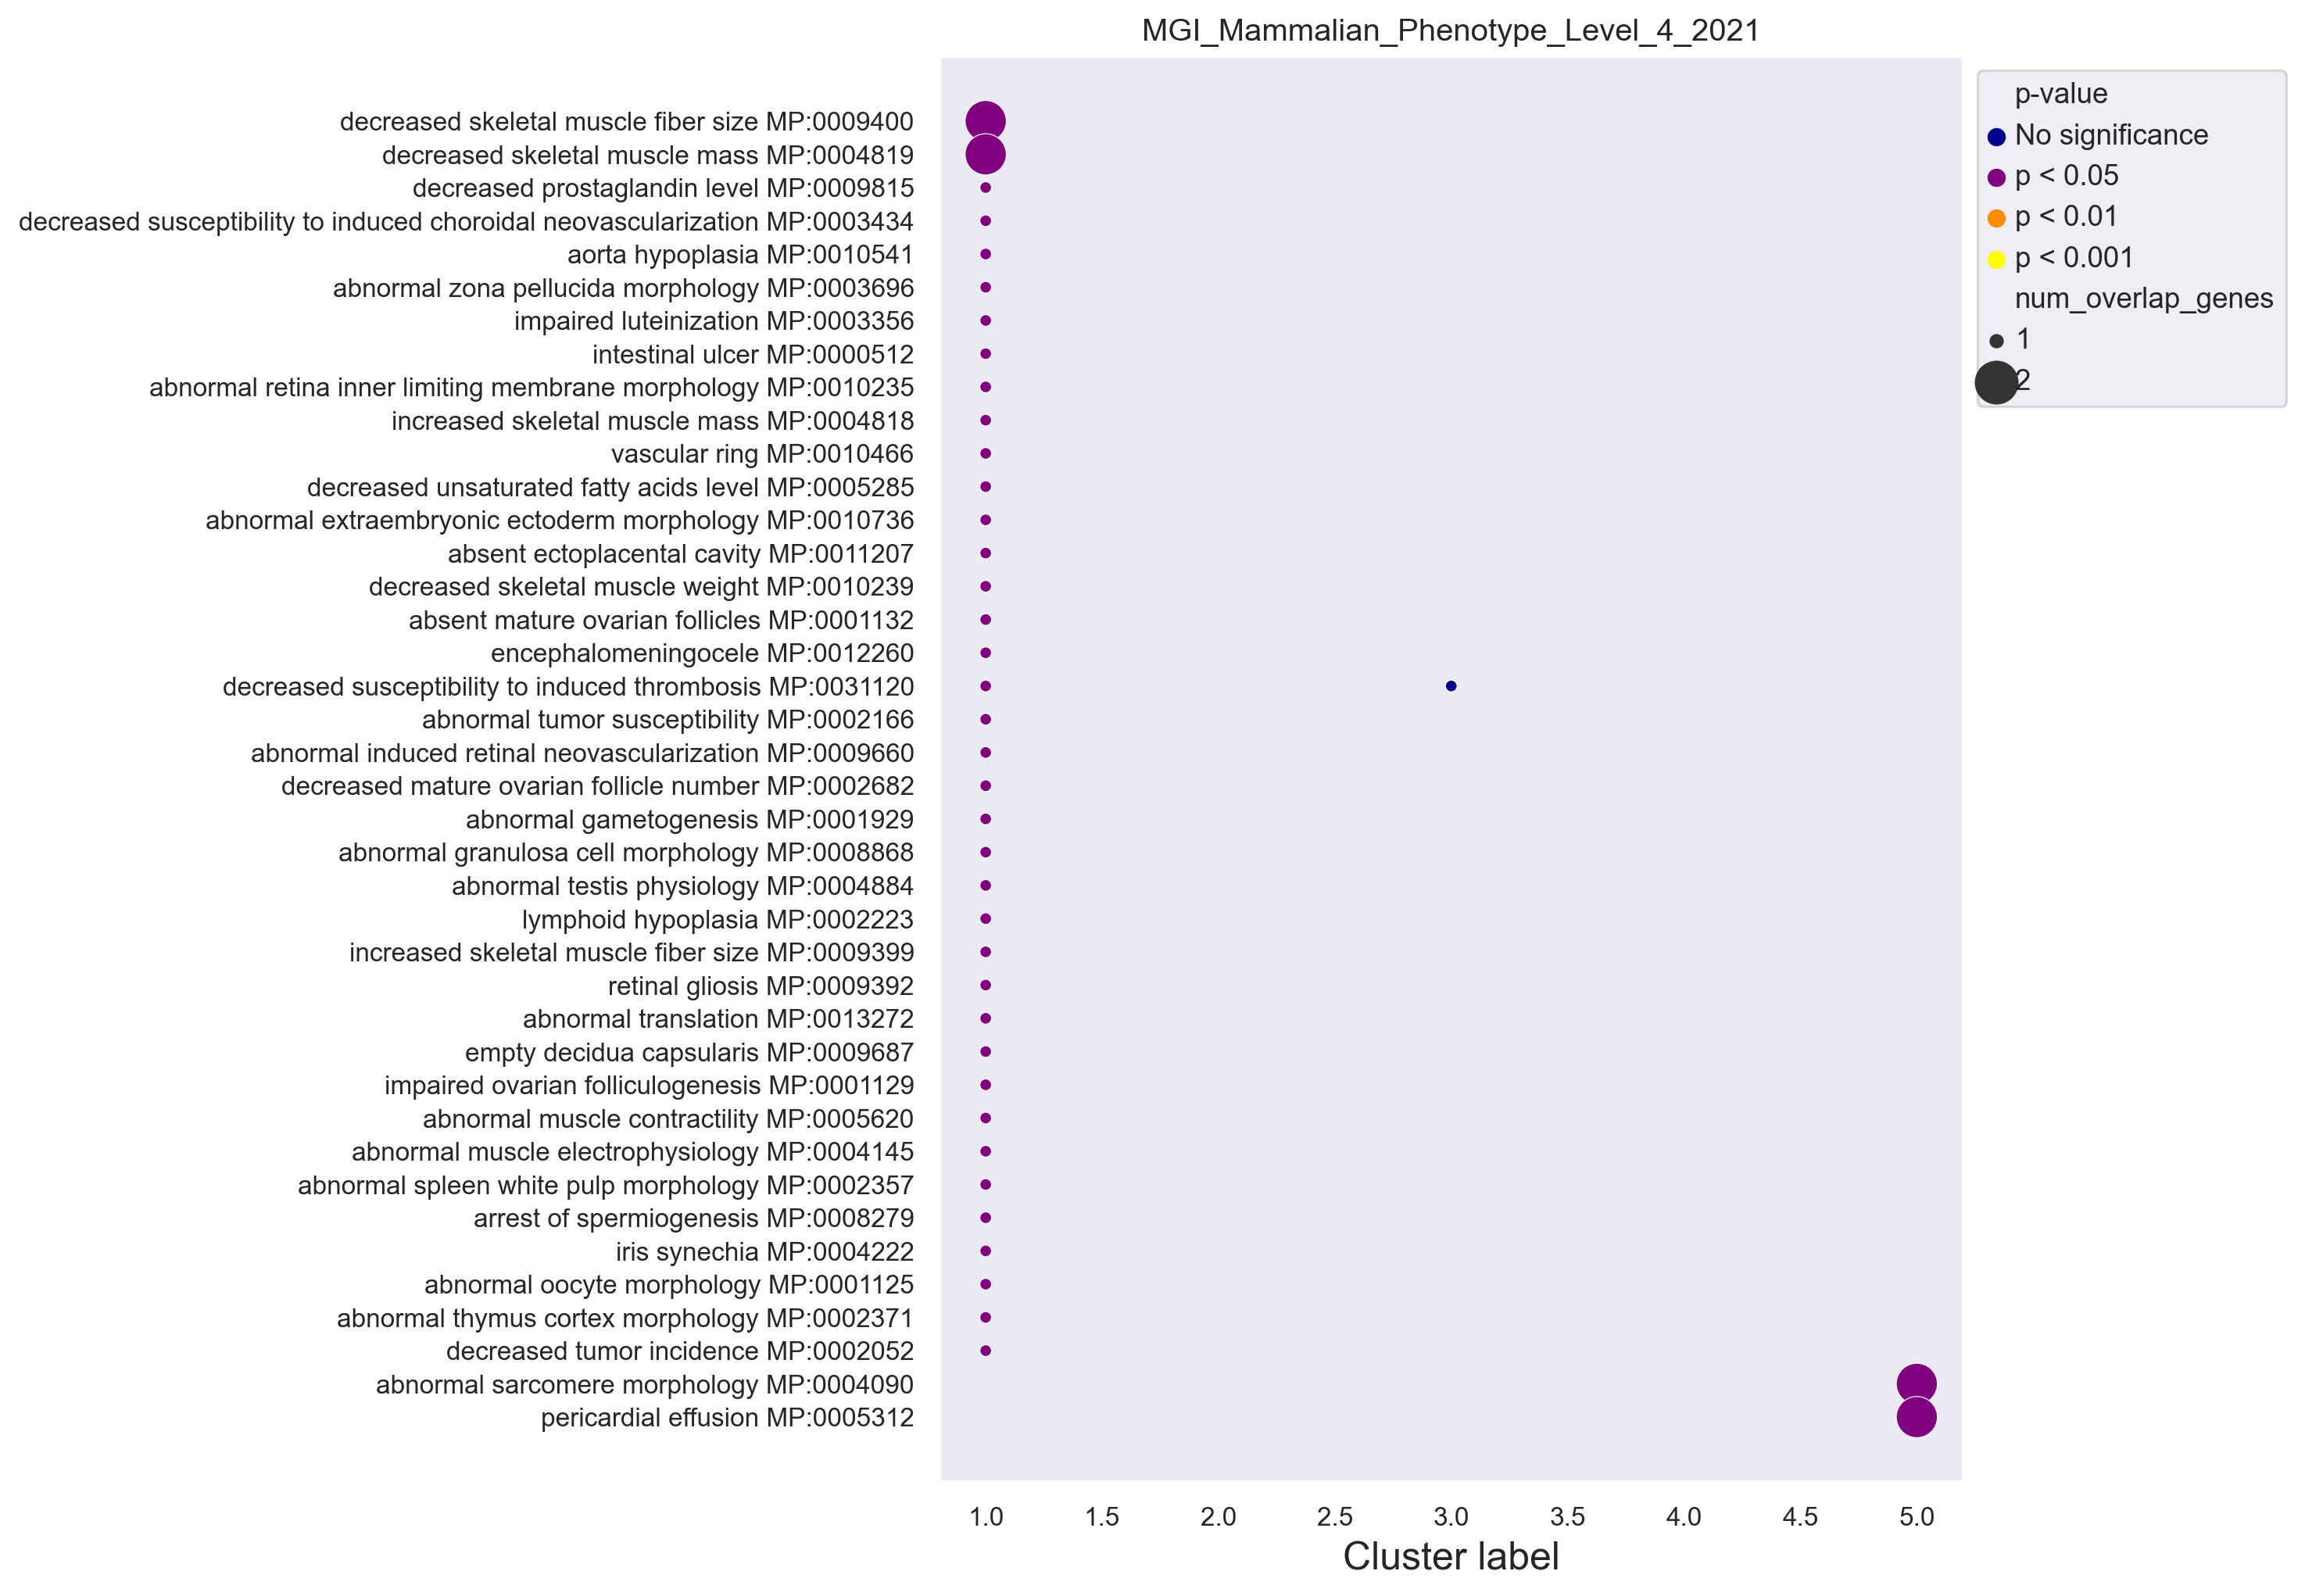

In [207]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## KEGG_2021_Human

In [208]:
db_name = 'KEGG_2021_Human'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [209]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  \
Term                                                                  
Pathways in cancer                           1  0.057591   5.806667   
Melanoma                                     2  0.058179  18.720280   
Vasopressin-regulated water reabsorption     3  0.058179  18.720280   
Cell adhesion molecules                      4  0.082481  12.846154   
Renal cell carcinoma                         5  0.082481  12.846154   

                                          Combined score Overlapping genes  \
Term                                                                         
Pathways in cancer                             16.574498      [FGF9, ELOC]   
Melanoma                                       53.244723            [FGF9]   
Vasopressin-regulated water reabsorption       53.244723          [DYNLL2]   
Cell adhesion molecules                        32.053615          [CD99L2]   
Renal cell carcinoma                           32.053615            [ELOC]   

                                          Adjusted P-value  Old p-value  \
Term                                                                      
Pathways in cancer                                0.212397            0   
Melanoma                                          0.212397            0   
Vasopressin-regulated water reabsorption          0.212397            0   
Cell adhesion molecules                           0.212397            0   
Renal cell carcinoma                              0.212397            0   

                                          Old adjusted p-value  \
Term                                                             
Pathways in cancer                                           0   
Melanoma                                                     0   
Vasopressin-regulated water reabsorption                     0   
Cell adhesion molecules                                      0   
Renal cell carcinoma                                         0   

                                          num_overlap_genes  neg_log10(p_adj)  \
Term                                                                            
Pathways in cancer                                        2          0.672851   
Melanoma                                                  1          0.672851   
Vasopressin-regulated water reabsorption                  1          0.672851   
Cell adhesion molecules                                   1          0.672851   
Renal cell carcinoma                                      1          0.672851   

                                          cluster_label  
Term                                                     
Pathways in cancer                                    0  
Melanoma                                              0  
Vasopressin-regulated water reabsorption              0  
Cell adhesion molecules                               0  
Renal cell carcinoma                                  0

In [210]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

9

In [211]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

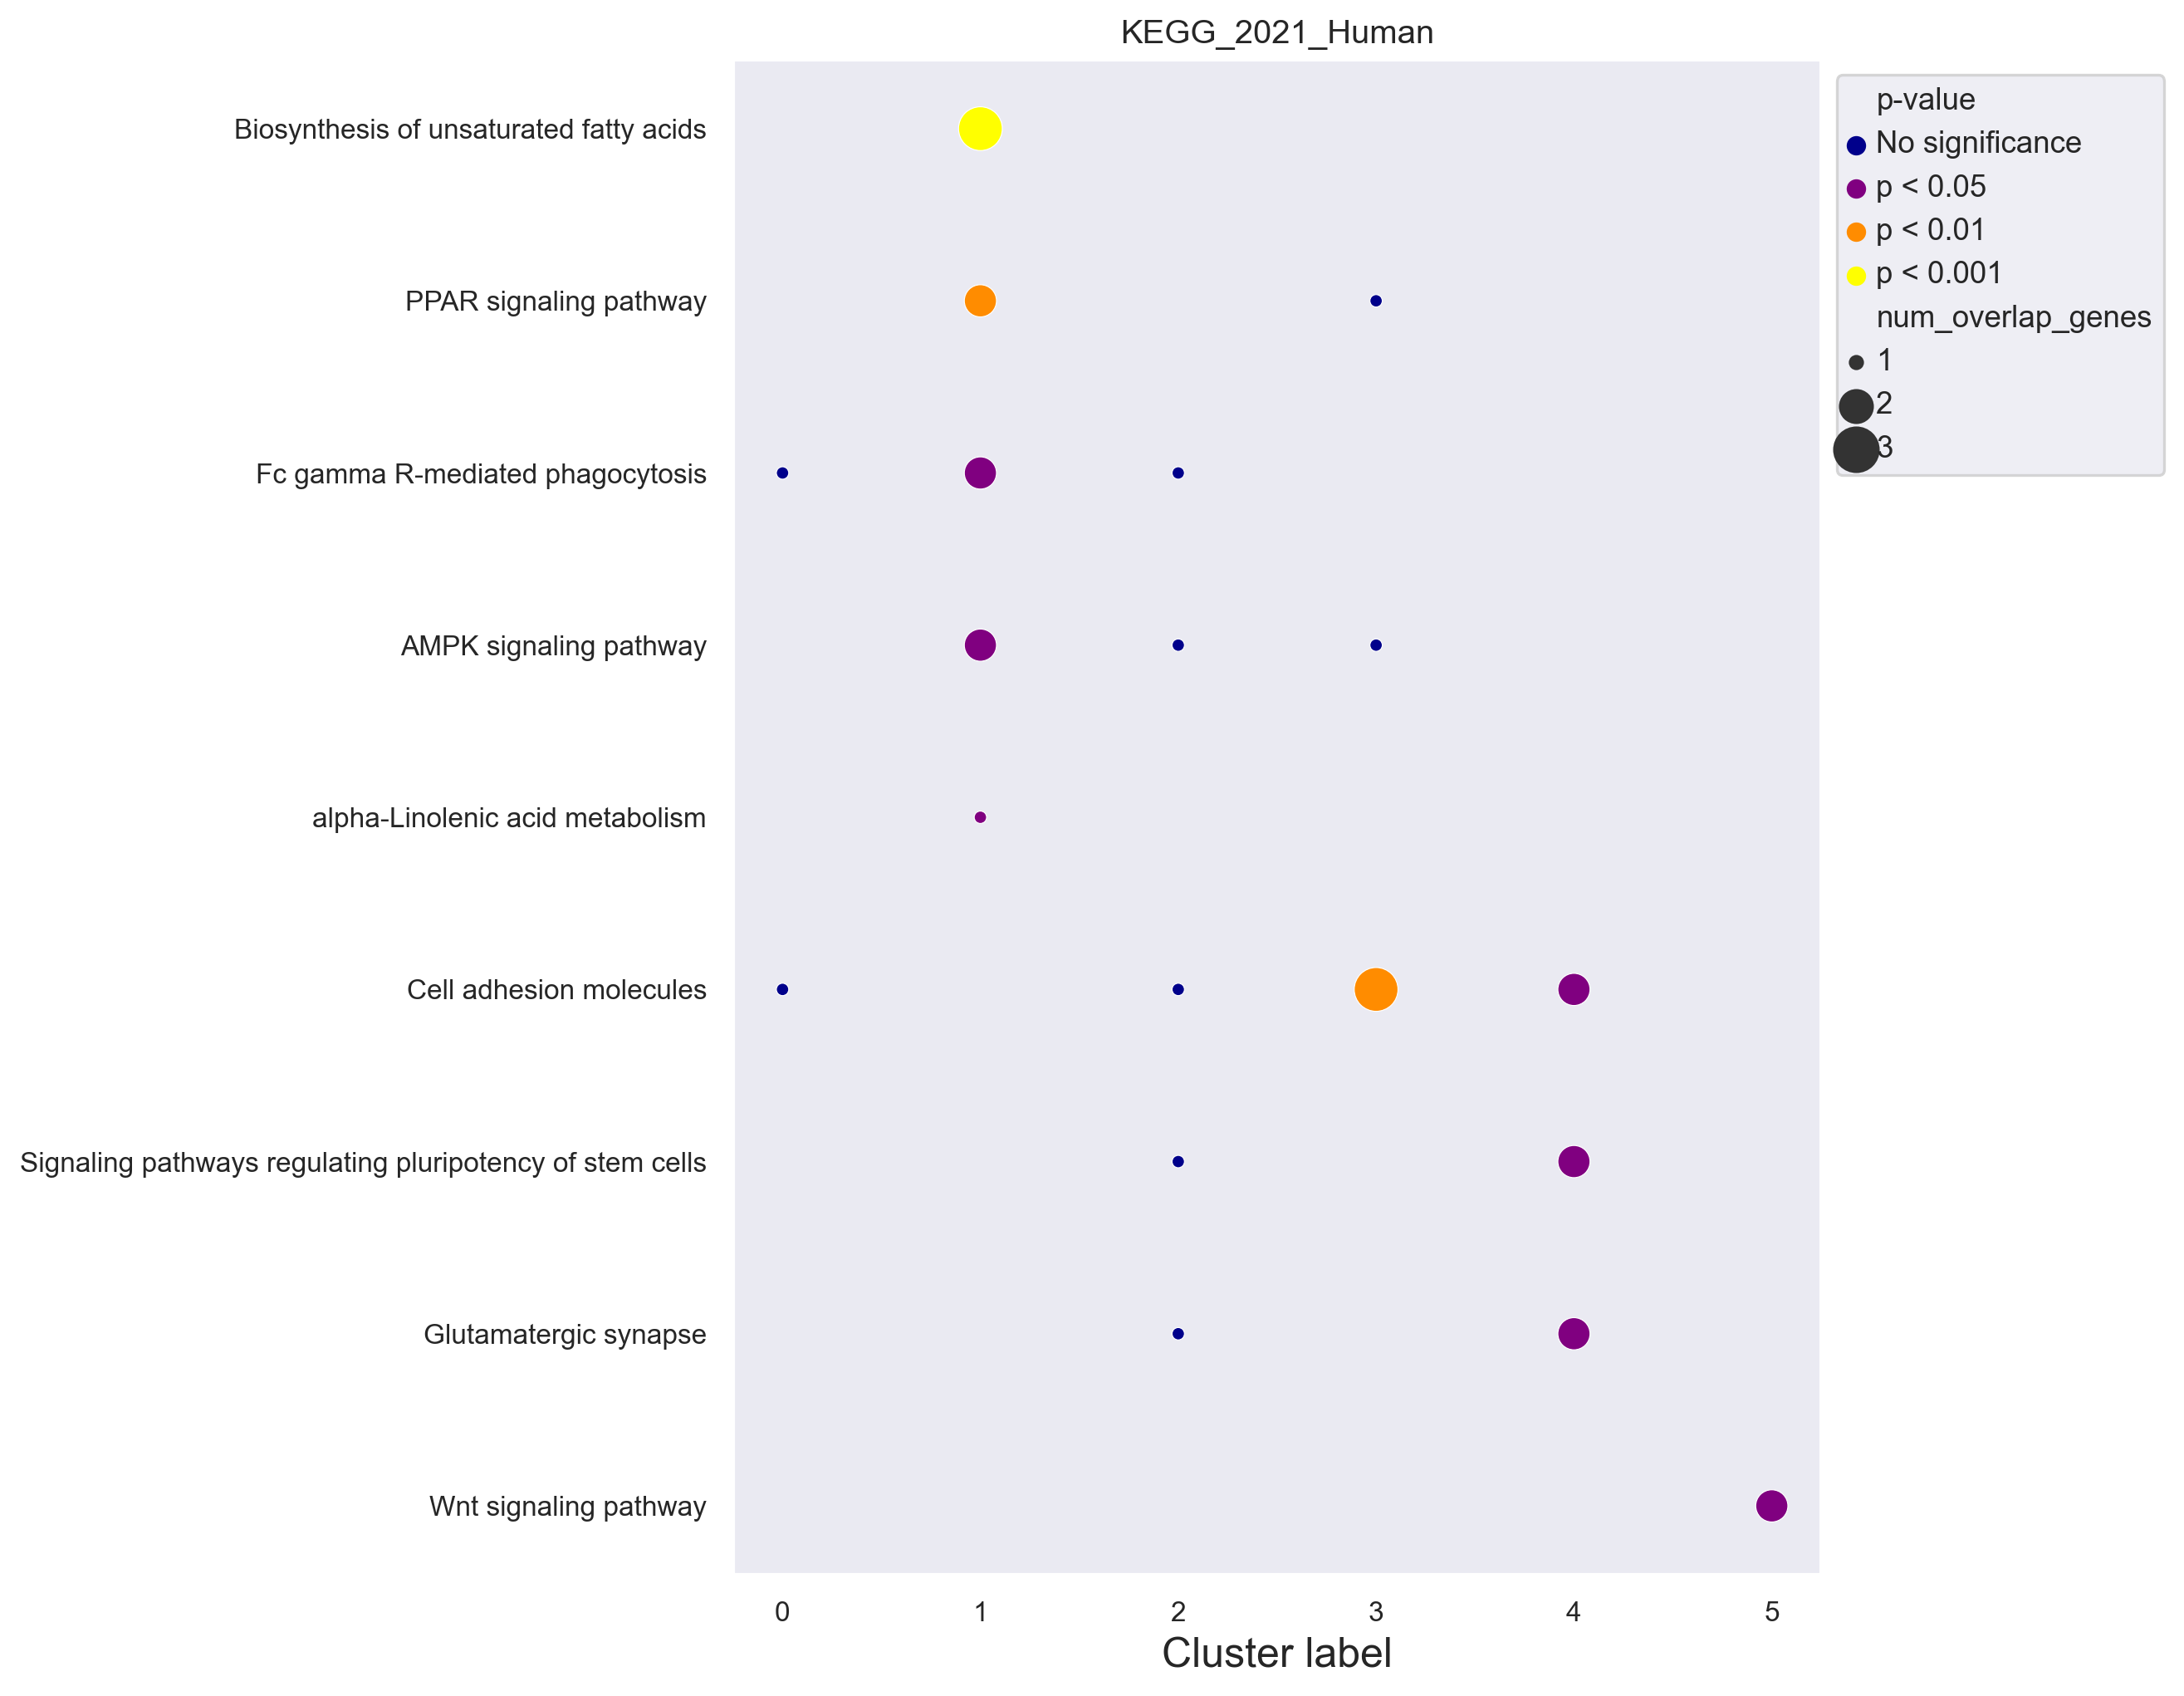

In [212]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))